# 1 - Introduction

Dataset resource : https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

## Identity
<p> Name : Shafira Laksitasari </p>
<p> Batch : FTDS-014 </p>
<p> Dataset : German Traffic Sign Recognition Benchmark </p>
<p> Objective : Identify Traffic sign based on the traffic sign images </p>

## Description

This dataset contain of 50,000 images of Traffic Sign. In these traffic sign there are 42 clasess of the sign. Those clasess are :

0. Speed limit (20km/h)
1. Speed limit (30km/h)
2. Speed limit (50km/h)
3. Speed limit (60km/h)
4. Speed limit (70km/h)
5. Speed limit (80km/h)
6. End of speed limit (80km/h)
7. Speed limit (100km/h)
8. Speed limit (120km/h)
9. No passing
10. No passing veh over 3.5 tons
11. Right-of-way at intersection
12. Priority road
13. Yield
14. Stop
15. No vehicles
16. Veh > 3.5 tons prohibited
17. No entry
18. General caution
19. Dangerous curve left
20. Dangerous curve right
21. Double curve
22. Bumpy road
23. Slippery road
24. Road narrows on the right
25. Road work
26. Traffic signals
27. Pedestrians
28. Children crossing
29. Bicycles crossing
30. Beware of ice/snow
31. Wild animals crossing
32. End speed + passing limits
33. Turn right ahead
34. Turn left ahead
35. Ahead only
36. Go straight or right
37. Go straight or left
38. Keep right
39. Keep left
40. Roundabout mandatory
41. End of no passing
42. End no passing veh > 3.5 tons


# 2 - Import Libraries

In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
import os

import sklearn
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras

import cv2
# from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

# from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Flatten, RandomFlip, RandomRotation

from keras import backend as K
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import confusion_matrix
import warnings
# pip install opencv-python
import pickle


# 3 - Data Loading

From the dataset provided, there are currently train dataset and test dataset. So each of the dataset will be checked separately in Data Loading.

In [250]:
# Import data (Train)
df_train= pd.read_csv('trafficsign/Train.csv')
df_train['Path'] = 'trafficsign/' + df_train['Path'].astype(str)
df_train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,trafficsign/Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,trafficsign/Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,trafficsign/Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,trafficsign/Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,trafficsign/Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,trafficsign/Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,trafficsign/Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,trafficsign/Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,trafficsign/Train/42/00042_00007_00028.png


In [251]:
# Import data (Test)
df_test= pd.read_csv('trafficsign/Test.csv')
df_test['Path'] = 'trafficsign/' + df_test['Path'].astype(str)
df_test

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,trafficsign/Test/00000.png
1,42,45,5,5,36,40,1,trafficsign/Test/00001.png
2,48,52,6,6,43,47,38,trafficsign/Test/00002.png
3,27,29,5,5,22,24,33,trafficsign/Test/00003.png
4,60,57,5,5,55,52,11,trafficsign/Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,trafficsign/Test/12625.png
12626,50,51,6,5,45,46,33,trafficsign/Test/12626.png
12627,29,29,6,6,24,24,6,trafficsign/Test/12627.png
12628,48,49,5,6,43,44,7,trafficsign/Test/12628.png


In [252]:
# Check Dataset info (Train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


There is no null found in the train dataset and all the datas type are compatible.

In [253]:
# Check Dataset info (Test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  int64 
 7   Path     12630 non-null  object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB


There is also no null found in the train dataset and all the datas type also compatible.

# 4 - Exploratory Data Analysis (EDA)

The dataset are from German Traffic Sign Recognition Benchmark and contain images which class were already Identified. Those clasess identified what the Traffic sign mean in each provided images. Currently, there are 42 class on the dataset. Those class can be seen from the table below. The table give the traffic sign image with the description in each class (Image can be displayed by Open in New Tab or Window).

<table>
  <tr>
    <th>Class ID</th>
    <th>Sign Image</th>
    <th>Description</th>
  </tr>
  <tr>
    <td style="text-align:center">0</td>
    <td><img src = "trafficsign/Meta/0.png"></td>
    <td style="text-align:center">Speed limit (20km/h)</td>
  </tr>
  <tr>
    <td style="text-align:center">1</td>
    <td><img src = "trafficsign/Meta/1.png"></td>
    <td style="text-align:center">Speed limit (30km/h)</td>
  </tr>
  <tr>
    <td style="text-align:center">2</td>
    <td><img src = "trafficsign/Meta/2.png"></td>
    <td style="text-align:center">Speed limit (50km/h)</td>
  </tr>
  <tr>
    <td style="text-align:center">3</td>
    <td><img src = "trafficsign/Meta/3.png"></td>
    <td style="text-align:center">Speed limit (60km/h)</td>
  </tr>
  <tr>
    <td style="text-align:center">4</td>
    <td><img src = "trafficsign/Meta/4.png"></td>
    <td style="text-align:center">Speed limit (70km/h)</td>
  </tr>
  <tr>
    <td style="text-align:center">5</td>
    <td><img src = "trafficsign/Meta/5.png"></td>
    <td style="text-align:center">Speed limit (80km/h)</td>
  </tr>
  <tr>
    <td style="text-align:center">6</td>
    <td><img src = "trafficsign/Meta/6.png"></td>
    <td style="text-align:center">End of speed limit (80km/h)</td>
  </tr>
  <tr>
    <td style="text-align:center">7</td>
    <td><img src = "trafficsign/Meta/7.png"></td>
    <td style="text-align:center">Speed limit (100km/h)</td>
  </tr>
  <tr>
    <td style="text-align:center">8</td>
    <td><img src = "trafficsign/Meta/8.png"></td>
    <td style="text-align:center">Speed limit (120km/h)</td>
  </tr>
  <tr>
    <td style="text-align:center">9</td>
    <td><img src = "trafficsign/Meta/9.png"></td>
    <td style="text-align:center">No passing</td>
  </tr>
  <tr>
    <td style="text-align:center">10</td>
    <td><img src = "trafficsign/Meta/10.png"></td>
    <td style="text-align:center">No passing veh over 3.5 tons</td>
  </tr>
  <tr>
    <td style="text-align:center">11</td>
    <td><img src = "trafficsign/Meta/11.png"></td>
    <td style="text-align:center">Right-of-way at intersection</td>
  </tr>
  <tr>
    <td style="text-align:center">12</td>
    <td><img src = "trafficsign/Meta/12.png"></td>
    <td style="text-align:center">Priority road</td>
  </tr>
  <tr>
    <td style="text-align:center">13</td>
    <td><img src = "trafficsign/Meta/13.png"></td>
    <td style="text-align:center">Yield</td>
  </tr>
  <tr>
    <td style="text-align:center">14</td>
    <td><img src = "trafficsign/Meta/14.png"></td>
    <td style="text-align:center">Stop</td>
  </tr>
  <tr>
    <td style="text-align:center">15</td>
    <td><img src = "trafficsign/Meta/15.png"></td>
    <td style="text-align:center">No vehicles</td>
  </tr>
  <tr>
    <td style="text-align:center">16</td>
    <td><img src = "trafficsign/Meta/16.png"></td>
    <td style="text-align:center">Veh > 3.5 tons prohibited</td>
  </tr>
  <tr>
    <td style="text-align:center">17</td>
    <td><img src = "trafficsign/Meta/17.png"></td>
    <td style="text-align:center">No entry</td>
  </tr>
  <tr>
    <td style="text-align:center">18</td>
    <td><img src = "trafficsign/Meta/18.png"></td>
    <td style="text-align:center">General caution</td>
  </tr>
  <tr>
    <td style="text-align:center">19</td>
    <td><img src = "trafficsign/Meta/19.png"></td>
    <td style="text-align:center">Dangerous curve left</td>
  </tr>
  <tr>
    <td style="text-align:center">20</td>
    <td><img src = "trafficsign/Meta/20.png"></td>
    <td style="text-align:center">Dangerous curve right</td>
  </tr>
  <tr>
    <td style="text-align:center">21</td>
    <td><img src = "trafficsign/Meta/21.png"></td>
    <td style="text-align:center">Double curve</td>
  </tr>
  <tr>
    <td style="text-align:center">22</td>
    <td><img src = "trafficsign/Meta/22.png"></td>
    <td style="text-align:center">Bumpy road</td>
  </tr>
  <tr>
    <td style="text-align:center">23</td>
    <td><img src = "trafficsign/Meta/23.png"></td>
    <td style="text-align:center">Slippery road</td>
  </tr>
  <tr>
    <td style="text-align:center">24</td>
    <td><img src = "trafficsign/Meta/24.png"></td>
    <td style="text-align:center">Road narrows on the right</td>
  </tr>
  <tr>
    <td style="text-align:center">25</td>
    <td><img src = "trafficsign/Meta/25.png"></td>
    <td style="text-align:center">Road work</td>
  </tr>
  <tr>
    <td style="text-align:center">26</td>
    <td><img src = "trafficsign/Meta/26.png"></td>
    <td style="text-align:center">Traffic signals</td>
  </tr>
  <tr>
    <td style="text-align:center">27</td>
    <td><img src = "trafficsign/Meta/27.png"></td>
    <td style="text-align:center">Pedestrians</td>
  </tr>
  <tr>
    <td style="text-align:center">28</td>
    <td><img src = "trafficsign/Meta/28.png"></td>
    <td style="text-align:center">Children crossing</td>
  </tr>
  <tr>
    <td style="text-align:center">29</td>
    <td><img src = "trafficsign/Meta/29.png"></td>
    <td style="text-align:center">Bicycles crossing</td>
  </tr>
  <tr>
    <td style="text-align:center">30</td>
    <td><img src = "trafficsign/Meta/30.png"></td>
    <td style="text-align:center">Beware of ice/snow</td>
  </tr>
  <tr>
    <td style="text-align:center">31</td>
    <td><img src = "trafficsign/Meta/31.png"></td>
    <td style="text-align:center">Wild animals crossing</td>
  </tr>
    <tr>
    <td style="text-align:center">32</td>
    <td><img src = "trafficsign/Meta/32.png"></td>
    <td style="text-align:center">End speed + passing limits</td>
  </tr>
  <tr>
    <td style="text-align:center">33</td>
    <td><img src = "trafficsign/Meta/33.png"></td>
    <td style="text-align:center">Turn right ahead</td>
  </tr>
  <tr>
    <td style="text-align:center">34</td>
    <td><img src = "trafficsign/Meta/34.png"></td>
    <td style="text-align:center">Turn left ahead</td>
  </tr>
  <tr>
    <td style="text-align:center">35</td>
    <td><img src = "trafficsign/Meta/35.png"></td>
    <td style="text-align:center">Ahead only</td>
  </tr>
  <tr>
    <td style="text-align:center">36</td>
    <td><img src = "trafficsign/Meta/36.png"></td>
    <td style="text-align:center">Go straight or right</td>
  </tr>
  <tr>
    <td style="text-align:center">37</td>
    <td><img src = "trafficsign/Meta/37.png"></td>
    <td style="text-align:center">Go straight or left</td>
  </tr>
  <tr>
    <td style="text-align:center">38</td>
    <td><img src = "trafficsign/Meta/38.png"></td>
    <td style="text-align:center">Keep right</td>
  </tr>
  <tr>
    <td style="text-align:center">39</td>
    <td><img src = "trafficsign/Meta/39.png"></td>
    <td style="text-align:center">Keep left</td>
  </tr>
  <tr>
    <td style="text-align:center">40</td>
    <td><img src = "trafficsign/Meta/40.png"></td>
    <td style="text-align:center">Roundabout mandatory</td>
  </tr>
  <tr>
    <td style="text-align:center">41</td>
    <td><img src = "trafficsign/Meta/41.png"></td>
    <td style="text-align:center">End of no passing</td>
  </tr>
  <tr>
    <td style="text-align:center">42</td>
    <td><img src = "trafficsign/Meta/42.png"></td>
    <td style="text-align:center">End no passing veh > 3.5 tons</td>
  </tr>
</table>

German has more thousand sign including Warning signs, Regulatory Signs, Directional Signs, Trafic Installations, and Supplementary signs. The current Sign from the table is assumed as the common signs, so the conclusion not all sign is provided.

source : https://routetogermany.com/drivingingermany/road-signs#supplementary-signs

In this dataset, the dataset splitted into train and test by default. So the dataset  of both train and test will be merged before continue the EDA. In the dataset, there are Width, Height, Roi.X1, Roi.Y1, Roi.X2, Roi.Y2, and ClassId. Roi.X1, Roi.Y1, Roi.X2, and Roi.Y2 give description about upper left coordinate (Roi.X1, Roi.Y1, Roi.X2) sign and Lower right coordinate (Roi.X2, Roi.Y2) sign on the image. The most important features to identifying the image in this dataset is only the image itself, so the column contain images path will only became our focus. But others unused column can become EDA references. The images currently are in .png format.

In [254]:
# Concate Dataset

df_all = pd.concat([df_train, df_test], axis=0)
df_all.shape

(51839, 8)

In [255]:
df_all.describe().T

,count,mean,std,min,25%,50%,75%,max
Width,51839.0,50.755937,24.499807,25.0,34.0,43.0,58.0,266.0
Height,51839.0,50.337584,23.258706,25.0,35.0,43.0,58.0,232.0
Roi.X1,51839.0,5.999151,1.492448,0.0,5.0,6.0,6.0,23.0
Roi.Y1,51839.0,5.967264,1.395798,5.0,5.0,6.0,6.0,20.0
Roi.X2,51839.0,45.116206,23.236830,20.0,29.0,38.0,53.0,244.0
Roi.Y2,51839.0,44.735624,22.099631,20.0,30.0,38.0,52.0,212.0
ClassId,51839.0,15.730570,11.997481,0.0,5.0,12.0,25.0,42.0


When train and test dataset combined, all of the values from data description are changed. Based on table above, The average mean of width in each image is 50.75 with minimun width 25 and the maximun width 266. The range are quite high. Meanwhile for the height, the mean of height in each image is 50.3 with minimun height 25 and the maximun height 232. The range is also hight but not as high as the width. On upper left sign, tht coordinate mean is (5.9, 5.9) while the on lower right sign, the coordinate mean is (45.1, 44.7). If combined the mean an average image will have 50.75 x 50.33 size with their traffic sign position on the image at upper left will have coordinate (5.9, 5.9).

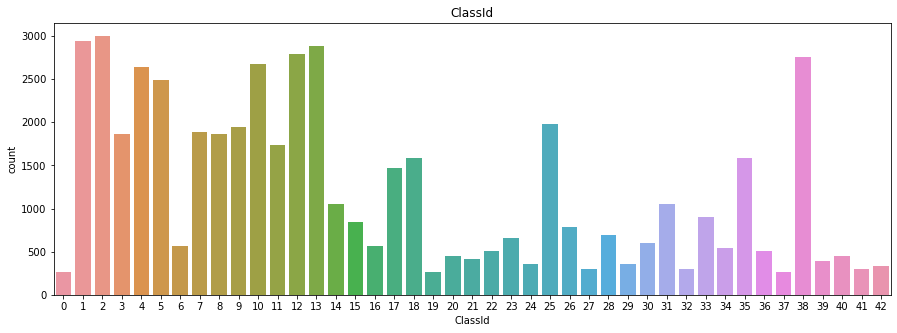

In [256]:
plt.figure(figsize = (15,5))
sns.countplot(x='ClassId', data=df_all)
plt.title('ClassId')
plt.show()

The Histogram above showed the number of class in each ClassId. If we look at the histogram , all of the datas are imbalance. The most dominant number of signs is sign with ClassId number 2 (Speed limit (50km/h)) with total 3000 image. Meanwhile for the least amount there are 3 traffic sign with ClassId numbers 0 (Speed limit (20km/h)), 29 (Bicycles crossing), and 37 (Go straight or left) with total in each classID 270 images. This is probably due to the Traffic Sign in class 2 are pretty common but with this situation, the Traffic sign will hard to identify. In that case, the imbalance situation later will be solved. 

In [257]:
df_all.head(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,trafficsign/Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,trafficsign/Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,trafficsign/Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,trafficsign/Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,trafficsign/Train/20/00020_00000_00004.png


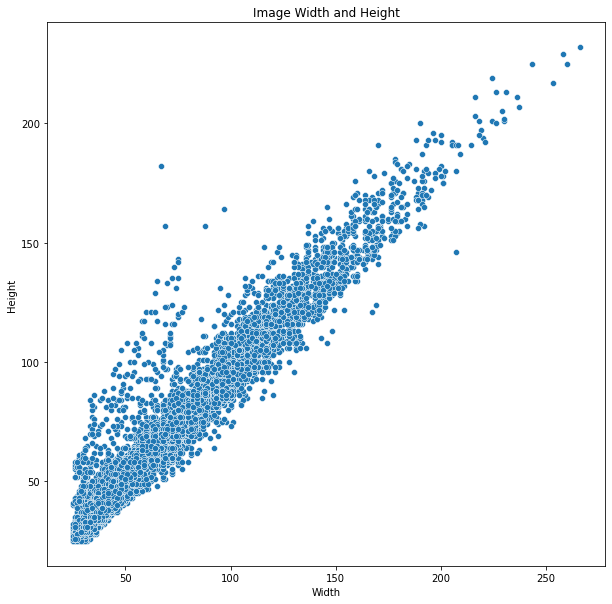

In [258]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='Width', y='Height', data=df_all)
plt.title('Image Width and Height')
plt.show()

Based on the scatterplot above, it can be seen that the images provided have varying lengths and widths. This inequality is assumed to affect the performance of the model on architecture parameters, information loss, feature extraction, model complexity, hyper parameters. Therefore, later all images will be the same in length and width.

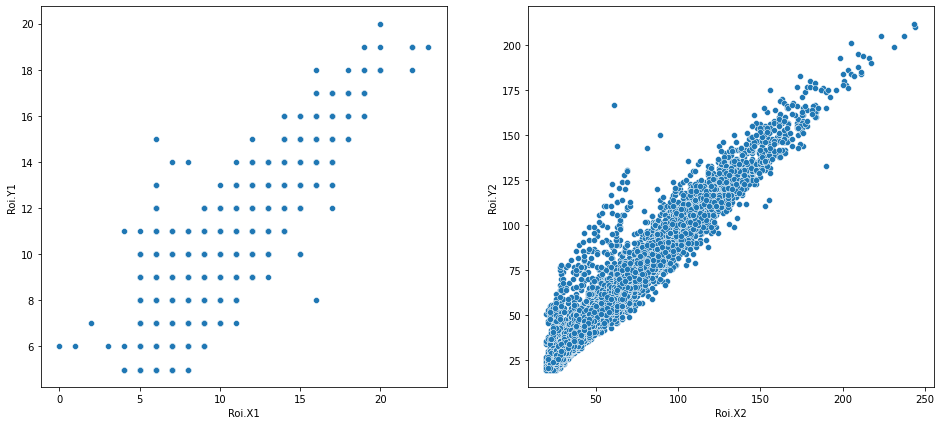

In [259]:
fig, ax =plt.subplots(1,2, figsize = (16,7))
sns.scatterplot(x='Roi.X1', y='Roi.Y1', data=df_all,ax=ax[0])
sns.scatterplot(x='Roi.X2', y='Roi.Y2', data=df_all, ax=ax[1]) # Hue not showing all classes
plt.show()

 Now let's see the coordinate of traffic sign position. The left scatter plot at above showing the coordinate of Upper Left sign while the right scatter plot showing the coordinate of Lower Right sign. Based on the left scatter plot, most sign has identical coordinate while the right scatter plot the coordinates way more varied. There is still unknown what caused this result but there is posibility the data obtained with special camera or AI tool which can identified the position images at upper left better but cannot decided where the sign end at lower right. The image size may also affect the coordinates. Mind that there is/are images boundaries of the sign which intersect with edge of the image. If there is wide space on another edge of the image, the image not consider good enough to being identified. the more the overall position of the sign is centered, the better the result. For now it will optimized when perform the training later.

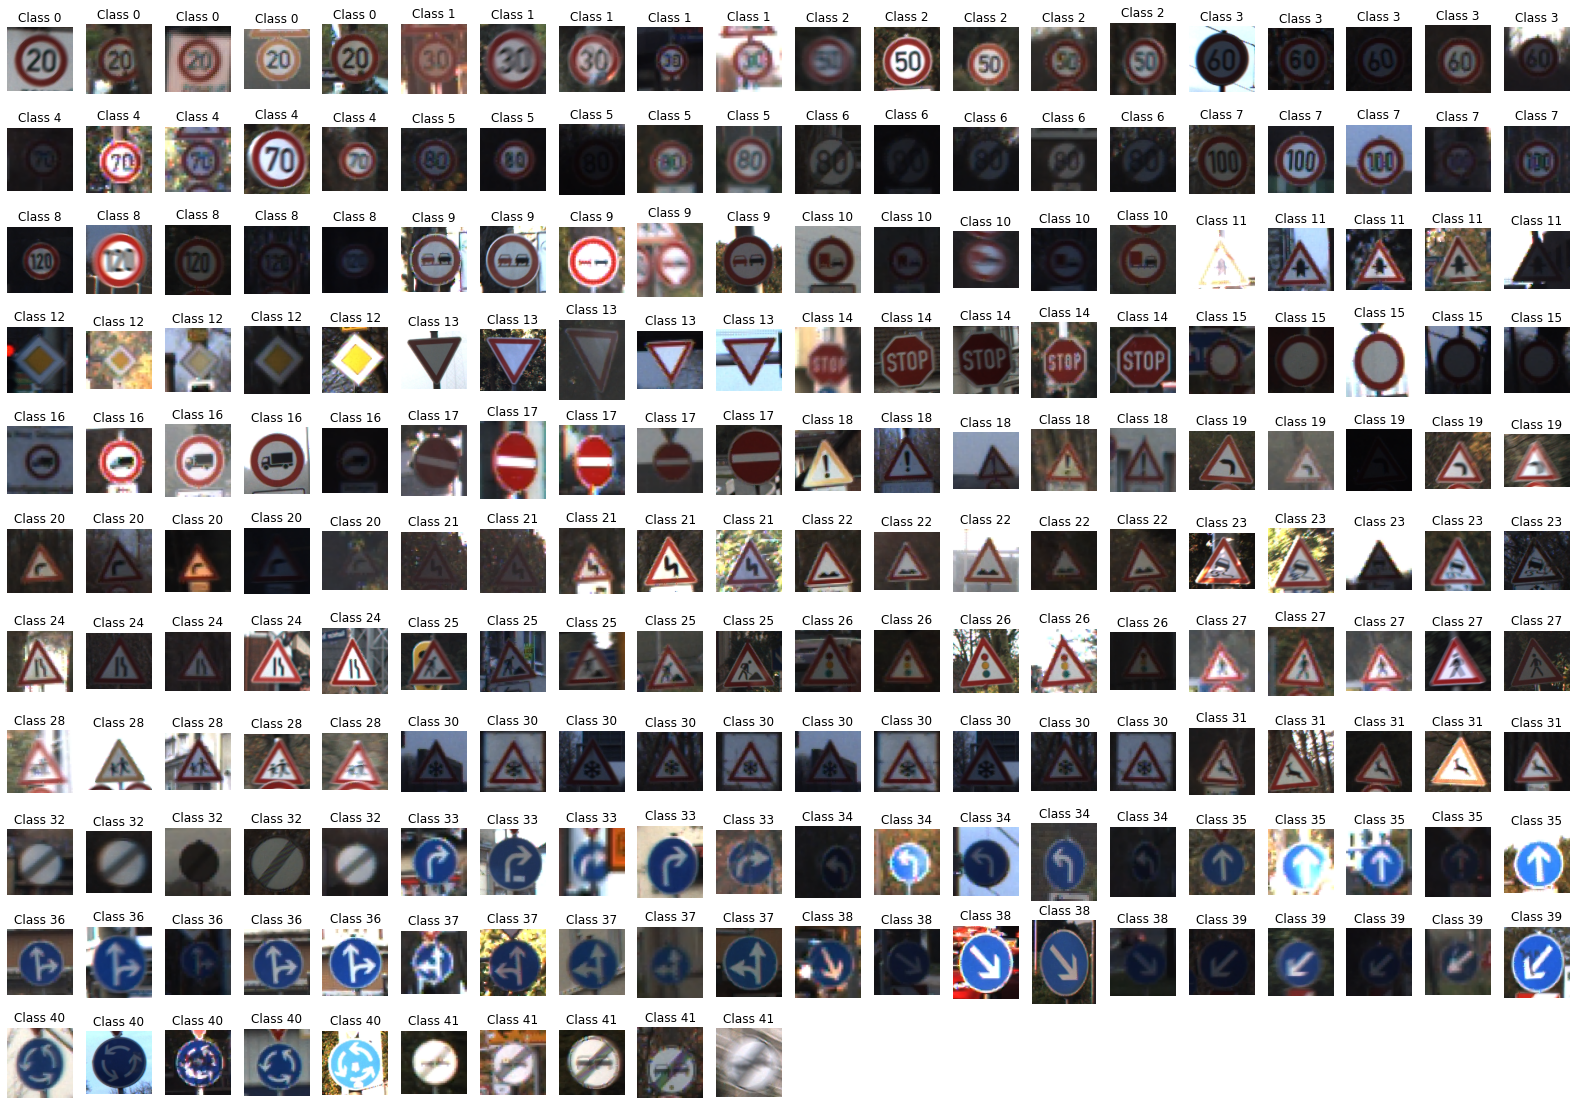

In [260]:
train_dir = 'trafficsign/Train' # image folder

# get the list of png from sub image class folders
Class0_imgs = [fn for fn in os.listdir(f'{train_dir}/0') if fn.endswith('.png')]
Class1_imgs = [fn for fn in os.listdir(f'{train_dir}/1') if fn.endswith('.png')]
Class2_imgs = [fn for fn in os.listdir(f'{train_dir}/2') if fn.endswith('.png')]
Class3_imgs = [fn for fn in os.listdir(f'{train_dir}/3') if fn.endswith('.png')]
Class4_imgs = [fn for fn in os.listdir(f'{train_dir}/4') if fn.endswith('.png')]
Class5_imgs = [fn for fn in os.listdir(f'{train_dir}/5') if fn.endswith('.png')]
Class6_imgs = [fn for fn in os.listdir(f'{train_dir}/6') if fn.endswith('.png')]
Class7_imgs = [fn for fn in os.listdir(f'{train_dir}/7') if fn.endswith('.png')]
Class8_imgs = [fn for fn in os.listdir(f'{train_dir}/8') if fn.endswith('.png')]
Class9_imgs = [fn for fn in os.listdir(f'{train_dir}/9') if fn.endswith('.png')]
Class10_imgs = [fn for fn in os.listdir(f'{train_dir}/10') if fn.endswith('.png')]
Class11_imgs = [fn for fn in os.listdir(f'{train_dir}/11') if fn.endswith('.png')]
Class12_imgs = [fn for fn in os.listdir(f'{train_dir}/12') if fn.endswith('.png')]
Class13_imgs = [fn for fn in os.listdir(f'{train_dir}/13') if fn.endswith('.png')]
Class14_imgs = [fn for fn in os.listdir(f'{train_dir}/14') if fn.endswith('.png')]
Class15_imgs = [fn for fn in os.listdir(f'{train_dir}/15') if fn.endswith('.png')]
Class16_imgs = [fn for fn in os.listdir(f'{train_dir}/16') if fn.endswith('.png')]
Class17_imgs = [fn for fn in os.listdir(f'{train_dir}/17') if fn.endswith('.png')]
Class18_imgs = [fn for fn in os.listdir(f'{train_dir}/18') if fn.endswith('.png')]
Class19_imgs = [fn for fn in os.listdir(f'{train_dir}/19') if fn.endswith('.png')]
Class20_imgs = [fn for fn in os.listdir(f'{train_dir}/20') if fn.endswith('.png')]
Class20_imgs = [fn for fn in os.listdir(f'{train_dir}/20') if fn.endswith('.png')]
Class21_imgs = [fn for fn in os.listdir(f'{train_dir}/21') if fn.endswith('.png')]
Class22_imgs = [fn for fn in os.listdir(f'{train_dir}/22') if fn.endswith('.png')]
Class23_imgs = [fn for fn in os.listdir(f'{train_dir}/23') if fn.endswith('.png')]
Class24_imgs = [fn for fn in os.listdir(f'{train_dir}/24') if fn.endswith('.png')]
Class25_imgs = [fn for fn in os.listdir(f'{train_dir}/25') if fn.endswith('.png')]
Class26_imgs = [fn for fn in os.listdir(f'{train_dir}/26') if fn.endswith('.png')]
Class27_imgs = [fn for fn in os.listdir(f'{train_dir}/27') if fn.endswith('.png')]
Class28_imgs = [fn for fn in os.listdir(f'{train_dir}/28') if fn.endswith('.png')]
Class29_imgs = [fn for fn in os.listdir(f'{train_dir}/29') if fn.endswith('.png')]
Class30_imgs = [fn for fn in os.listdir(f'{train_dir}/30') if fn.endswith('.png')]
Class31_imgs = [fn for fn in os.listdir(f'{train_dir}/31') if fn.endswith('.png')]
Class32_imgs = [fn for fn in os.listdir(f'{train_dir}/32') if fn.endswith('.png')]
Class33_imgs = [fn for fn in os.listdir(f'{train_dir}/33') if fn.endswith('.png')]
Class34_imgs = [fn for fn in os.listdir(f'{train_dir}/34') if fn.endswith('.png')]
Class35_imgs = [fn for fn in os.listdir(f'{train_dir}/35') if fn.endswith('.png')]
Class36_imgs = [fn for fn in os.listdir(f'{train_dir}/36') if fn.endswith('.png')]
Class37_imgs = [fn for fn in os.listdir(f'{train_dir}/37') if fn.endswith('.png')]
Class38_imgs = [fn for fn in os.listdir(f'{train_dir}/38') if fn.endswith('.png')]
Class39_imgs = [fn for fn in os.listdir(f'{train_dir}/39') if fn.endswith('.png')]
Class40_imgs = [fn for fn in os.listdir(f'{train_dir}/40') if fn.endswith('.png')]
Class41_imgs = [fn for fn in os.listdir(f'{train_dir}/41') if fn.endswith('.png')]
Class42_imgs = [fn for fn in os.listdir(f'{train_dir}/42') if fn.endswith('.png')]

# randomly select 5 of each
xo = 5
select_Class0 = np.random.choice(Class0_imgs, xo, replace = False)
select_Class1 = np.random.choice(Class1_imgs, xo, replace = False)
select_Class2 = np.random.choice(Class2_imgs, xo, replace = False)
select_Class3 = np.random.choice(Class3_imgs, xo, replace = False)
select_Class4 = np.random.choice(Class4_imgs, xo, replace = False)
select_Class5 = np.random.choice(Class5_imgs, xo, replace = False)
select_Class6 = np.random.choice(Class6_imgs, xo, replace = False)
select_Class7 = np.random.choice(Class7_imgs, xo, replace = False)
select_Class8 = np.random.choice(Class8_imgs, xo, replace = False)
select_Class9 = np.random.choice(Class9_imgs, xo, replace = False)
select_Class10 = np.random.choice(Class10_imgs, xo, replace = False)
select_Class11 = np.random.choice(Class11_imgs, xo, replace = False)
select_Class12 = np.random.choice(Class12_imgs, xo, replace = False)
select_Class13 = np.random.choice(Class13_imgs, xo, replace = False)
select_Class14 = np.random.choice(Class14_imgs, xo, replace = False)
select_Class15 = np.random.choice(Class15_imgs, xo, replace = False)
select_Class16 = np.random.choice(Class16_imgs, xo, replace = False)
select_Class17 = np.random.choice(Class17_imgs, xo, replace = False)
select_Class18 = np.random.choice(Class18_imgs, xo, replace = False)
select_Class19 = np.random.choice(Class19_imgs, xo, replace = False)
select_Class20 = np.random.choice(Class20_imgs, xo, replace = False)
select_Class21 = np.random.choice(Class21_imgs, xo, replace = False)
select_Class22 = np.random.choice(Class22_imgs, xo, replace = False)
select_Class23 = np.random.choice(Class23_imgs, xo, replace = False)
select_Class24 = np.random.choice(Class24_imgs, xo, replace = False)
select_Class25 = np.random.choice(Class25_imgs, xo, replace = False)
select_Class26 = np.random.choice(Class26_imgs, xo, replace = False)
select_Class27 = np.random.choice(Class27_imgs, xo, replace = False)
select_Class28 = np.random.choice(Class28_imgs, xo, replace = False)
select_Class29 = np.random.choice(Class29_imgs, xo, replace = False)
select_Class30 = np.random.choice(Class30_imgs, xo, replace = False)
select_Class31 = np.random.choice(Class31_imgs, xo, replace = False)
select_Class32 = np.random.choice(Class32_imgs, xo, replace = False)
select_Class33 = np.random.choice(Class33_imgs, xo, replace = False)
select_Class34 = np.random.choice(Class34_imgs, xo, replace = False)
select_Class35 = np.random.choice(Class35_imgs, xo, replace = False)
select_Class36 = np.random.choice(Class36_imgs, xo, replace = False)
select_Class37 = np.random.choice(Class37_imgs, xo, replace = False)
select_Class38 = np.random.choice(Class38_imgs, xo, replace = False)
select_Class39 = np.random.choice(Class39_imgs, xo, replace = False)
select_Class40 = np.random.choice(Class40_imgs, xo, replace = False)
select_Class41 = np.random.choice(Class41_imgs, xo, replace = False)
select_Class42 = np.random.choice(Class42_imgs, xo, replace = False)

#plotting 2 x 3 image matrix
fig = plt.figure(figsize = (28,20))
for i in range(210):
    xi=5
    if i < 1*xi:
        fp = f'{train_dir}/0/{select_Class0[i]}'
        label = 'Class 0'
    elif i < 2*xi:
        fp = f'{train_dir}/1/{select_Class1[i-1*xi]}'
        label = 'Class 1'
    elif i < 3*xi:
        fp = f'{train_dir}/2/{select_Class2[i-2*xi]}'
        label = 'Class 2'
    elif i < 4*xi:
        fp = f'{train_dir}/3/{select_Class3[i-3*xi]}'
        label = 'Class 3'
    elif i < 5*xi:
        fp = f'{train_dir}/4/{select_Class4[i-4*xi]}'
        label = 'Class 4'
    elif i < 6*xi:
        fp = f'{train_dir}/5/{select_Class5[i-5*xi]}'
        label = 'Class 5'
    elif i < 7*xi:
        fp = f'{train_dir}/6/{select_Class6[i-6*xi]}'
        label = 'Class 6'
    elif i < 8*xi:
        fp = f'{train_dir}/7/{select_Class7[i-7*xi]}'
        label = 'Class 7'
    elif i < 9*xi:
        fp = f'{train_dir}/8/{select_Class8[i-8*xi]}'
        label = 'Class 8'
    elif i < 10*xi:
        fp = f'{train_dir}/9/{select_Class9[i-9*xi]}'
        label = 'Class 9'

    elif i < 11*xi:
        fp = f'{train_dir}/10/{select_Class10[i-10*xi]}'
        label = 'Class 10'
    elif i < 12*xi:
        fp = f'{train_dir}/11/{select_Class11[i-11*xi]}'
        label = 'Class 11'
    elif i < 13*xi:
        fp = f'{train_dir}/12/{select_Class12[i-12*xi]}'
        label = 'Class 12'
    elif i < 14*xi:
        fp = f'{train_dir}/13/{select_Class13[i-13*xi]}'
        label = 'Class 13'
    elif i < 15*xi:
        fp = f'{train_dir}/14/{select_Class14[i-14*xi]}'
        label = 'Class 14'
    elif i < 16*xi:
        fp = f'{train_dir}/15/{select_Class15[i-15*xi]}'
        label = 'Class 15'
    elif i < 17*xi:
        fp = f'{train_dir}/16/{select_Class16[i-16*xi]}'
        label = 'Class 16'
    elif i < 18*xi:
        fp = f'{train_dir}/17/{select_Class17[i-17*xi]}'
        label = 'Class 17'
    elif i < 19*xi:
        fp = f'{train_dir}/18/{select_Class18[i-18*xi]}'
        label = 'Class 18'
    elif i < 20*xi:
        fp = f'{train_dir}/19/{select_Class19[i-19*xi]}'
        label = 'Class 19'

    elif i < 21*xi:
        fp = f'{train_dir}/20/{select_Class20[i-20*xi]}'
        label = 'Class 20'
    elif i < 22*xi:
        fp = f'{train_dir}/21/{select_Class21[i-21*xi]}'
        label = 'Class 21'
    elif i < 23*xi:
        fp = f'{train_dir}/22/{select_Class22[i-22*xi]}'
        label = 'Class 22'
    elif i < 24*xi:
        fp = f'{train_dir}/23/{select_Class23[i-23*xi]}'
        label = 'Class 23'
    elif i < 25*xi:
        fp = f'{train_dir}/24/{select_Class24[i-24*xi]}'
        label = 'Class 24'
    elif i < 26*xi:
        fp = f'{train_dir}/25/{select_Class25[i-25*xi]}'
        label = 'Class 25'
    elif i < 27*xi:
        fp = f'{train_dir}/26/{select_Class26[i-26*xi]}'
        label = 'Class 26'
    elif i < 28*xi:
        fp = f'{train_dir}/27/{select_Class27[i-27*xi]}'
        label = 'Class 27'
    elif i < 29*xi:
        fp = f'{train_dir}/28/{select_Class28[i-28*xi]}'
        label = 'Class 28'
    elif i < 20*xi:
        fp = f'{train_dir}/29/{select_Class29[i-29*xi]}'
        label = 'Class 29'

    elif i < 31*xi:
        fp = f'{train_dir}/30/{select_Class30[i-30*xi]}'
        label = 'Class 30'
    elif i < 32*xi:
        fp = f'{train_dir}/31/{select_Class31[i-31*xi]}'
        label = 'Class 31'
    elif i < 33*xi:
        fp = f'{train_dir}/32/{select_Class32[i-32*xi]}'
        label = 'Class 32'
    elif i < 34*xi:
        fp = f'{train_dir}/33/{select_Class33[i-33*xi]}'
        label = 'Class 33'
    elif i < 35*xi:
        fp = f'{train_dir}/34/{select_Class34[i-34*xi]}'
        label = 'Class 34'
    elif i < 36*xi:
        fp = f'{train_dir}/35/{select_Class35[i-35*xi]}'
        label = 'Class 35'
    elif i < 37*xi:
        fp = f'{train_dir}/36/{select_Class36[i-36*xi]}'
        label = 'Class 36'
    elif i < 38*xi:
        fp = f'{train_dir}/37/{select_Class37[i-37*xi]}'
        label = 'Class 37'
    elif i < 39*xi:
        fp = f'{train_dir}/38/{select_Class38[i-38*xi]}'
        label = 'Class 38'
    elif i < 40*xi:
        fp = f'{train_dir}/39/{select_Class39[i-39*xi]}'
        label = 'Class 39'

    elif i < 41*xi:
        fp = f'{train_dir}/40/{select_Class40[i-40*xi]}'
        label = 'Class 40'
    elif i < 42*xi:
        fp = f'{train_dir}/41/{select_Class41[i-41*xi]}'
        label = 'Class 41'
    elif i < 43*xi:
        p = f'{train_dir}/42/{select_Class42[i-42*xi]}'
        label = 'Class 42'
    ax = fig.add_subplot(11, 20, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp) # , color_mode='grayscale'
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()


The image analysis will only based on train dataset because this dataset is important for training the model. The figure above showing 5 sample in each categories in train dataset. Based on the figure :

1. There are images which clear enough and there are image which very blurry. Can be affected by camera quality, took the picture while moving, etc.
2. There are images which very bright and there are image which very dark. Can be affected by camera effect/filter or sun exposure.
3. There even also images that shadowed with another object such as tree. Sun or lamp position may affect this result.
4. Each of sign also have various background. It can be plain background or other scenery. Since the traffic sign often found in the open road it is understandable.

These  obstacles can affect training process. With the various properties from each image, next let's see the image average of each class based on matrix.

In [261]:
# making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
Class0_images = img2np(f'{train_dir}/0/', Class0_imgs)
Class1_images = img2np(f'{train_dir}/1/', Class1_imgs)
Class2_images = img2np(f'{train_dir}/2/', Class2_imgs)
Class3_images = img2np(f'{train_dir}/3/', Class3_imgs)
Class4_images = img2np(f'{train_dir}/4/', Class4_imgs)
Class5_images = img2np(f'{train_dir}/5/', Class5_imgs)
Class6_images = img2np(f'{train_dir}/6/', Class6_imgs)
Class7_images = img2np(f'{train_dir}/7/', Class7_imgs)
Class8_images = img2np(f'{train_dir}/8/', Class8_imgs)
Class9_images = img2np(f'{train_dir}/9/', Class9_imgs)

Class10_images = img2np(f'{train_dir}/10/', Class10_imgs)
Class11_images = img2np(f'{train_dir}/11/', Class11_imgs)
Class12_images = img2np(f'{train_dir}/12/', Class12_imgs)
Class13_images = img2np(f'{train_dir}/13/', Class13_imgs)
Class14_images = img2np(f'{train_dir}/14/', Class14_imgs)
Class15_images = img2np(f'{train_dir}/15/', Class15_imgs)
Class16_images = img2np(f'{train_dir}/16/', Class16_imgs)
Class17_images = img2np(f'{train_dir}/17/', Class17_imgs)
Class18_images = img2np(f'{train_dir}/18/', Class18_imgs)
Class19_images = img2np(f'{train_dir}/19/', Class19_imgs)

Class20_images = img2np(f'{train_dir}/20/', Class20_imgs)
Class21_images = img2np(f'{train_dir}/21/', Class21_imgs)
Class22_images = img2np(f'{train_dir}/22/', Class22_imgs)
Class23_images = img2np(f'{train_dir}/23/', Class23_imgs)
Class24_images = img2np(f'{train_dir}/24/', Class24_imgs)
Class25_images = img2np(f'{train_dir}/25/', Class25_imgs)
Class26_images = img2np(f'{train_dir}/26/', Class26_imgs)
Class27_images = img2np(f'{train_dir}/27/', Class27_imgs)
Class28_images = img2np(f'{train_dir}/28/', Class28_imgs)
Class29_images = img2np(f'{train_dir}/29/', Class29_imgs)

Class30_images = img2np(f'{train_dir}/30/', Class30_imgs)
Class31_images = img2np(f'{train_dir}/31/', Class31_imgs)
Class32_images = img2np(f'{train_dir}/32/', Class32_imgs)
Class33_images = img2np(f'{train_dir}/33/', Class33_imgs)
Class34_images = img2np(f'{train_dir}/34/', Class34_imgs)
Class35_images = img2np(f'{train_dir}/35/', Class35_imgs)
Class36_images = img2np(f'{train_dir}/36/', Class36_imgs)
Class37_images = img2np(f'{train_dir}/37/', Class37_imgs)
Class38_images = img2np(f'{train_dir}/38/', Class38_imgs)
Class39_images = img2np(f'{train_dir}/39/', Class39_imgs)

Class40_images = img2np(f'{train_dir}/40/', Class40_imgs)
Class41_images = img2np(f'{train_dir}/41/', Class41_imgs)
Class42_images = img2np(f'{train_dir}/42/', Class42_imgs)


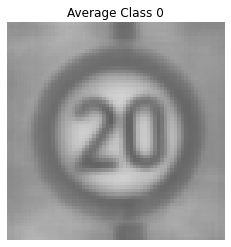

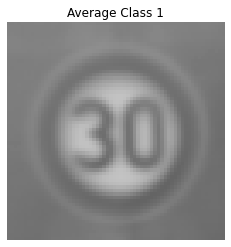

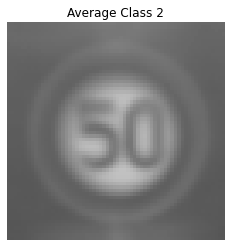

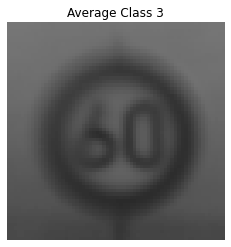

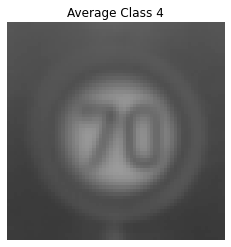

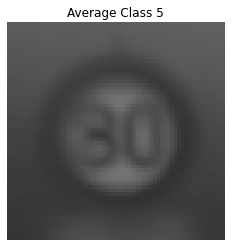

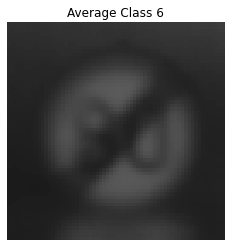

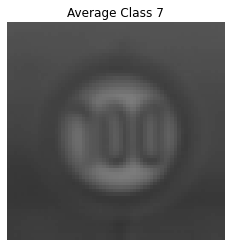

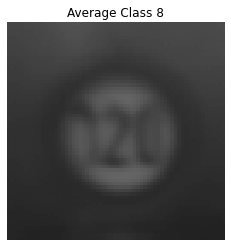

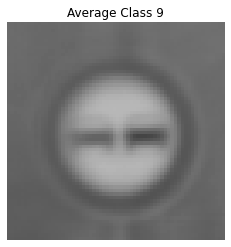

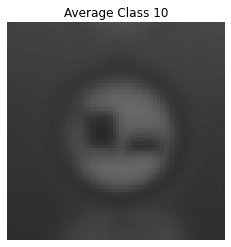

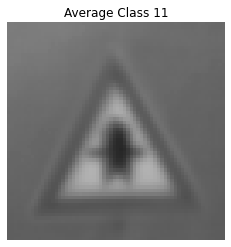

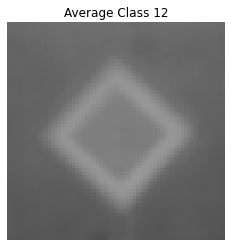

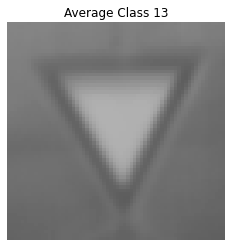

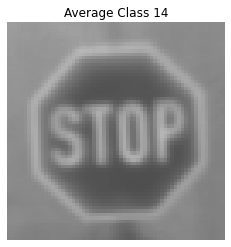

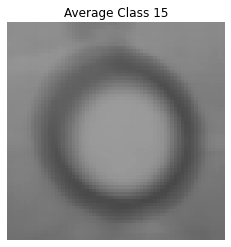

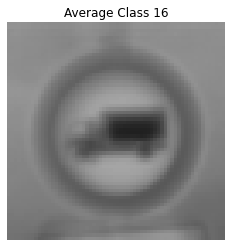

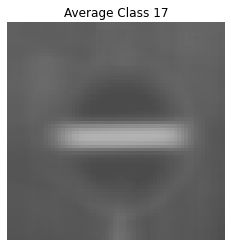

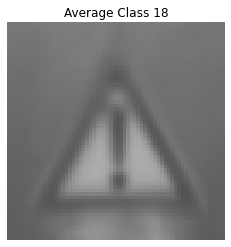

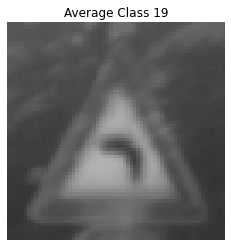

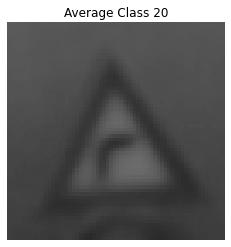

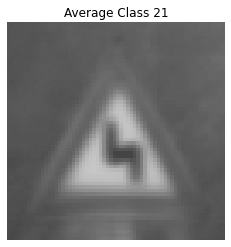

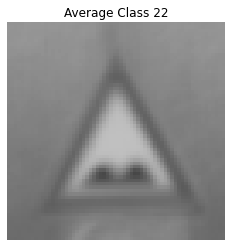

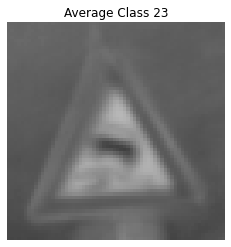

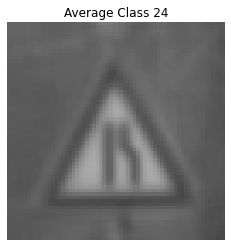

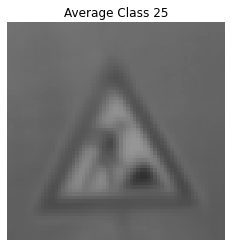

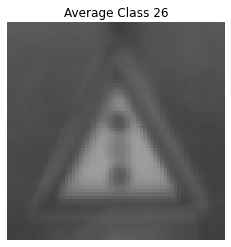

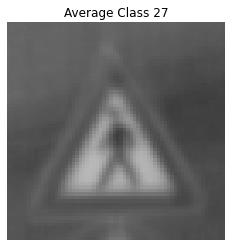

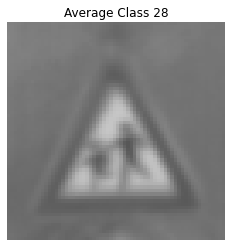

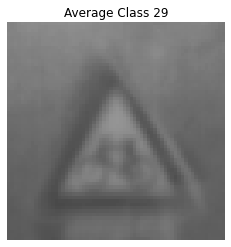

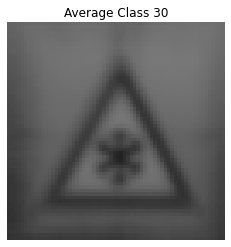

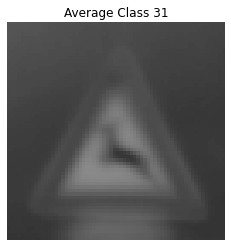

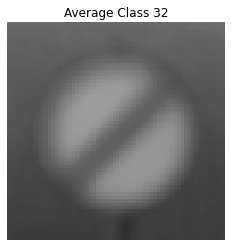

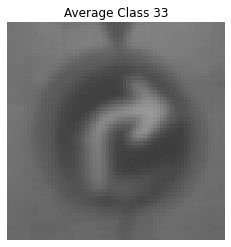

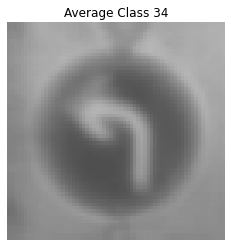

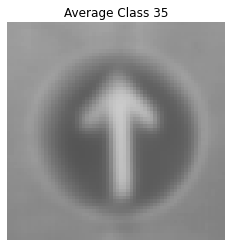

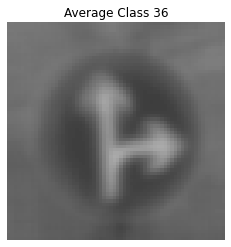

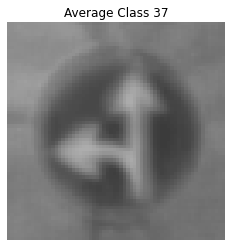

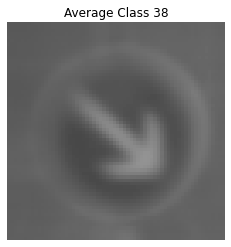

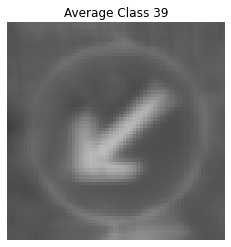

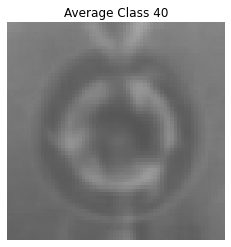

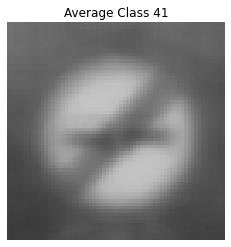

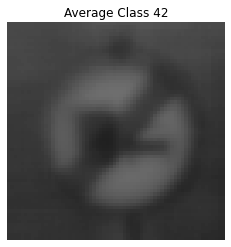

In [262]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

Class0_mean = find_mean_img(Class0_images, 'Class 0')
Class1_mean = find_mean_img(Class1_images, 'Class 1')
Class2_mean = find_mean_img(Class2_images, 'Class 2')
Class3_mean = find_mean_img(Class3_images, 'Class 3')
Class4_mean = find_mean_img(Class4_images, 'Class 4')
Class5_mean = find_mean_img(Class5_images, 'Class 5')
Class6_mean = find_mean_img(Class6_images, 'Class 6')
Class7_mean = find_mean_img(Class7_images, 'Class 7')
Class8_mean = find_mean_img(Class8_images, 'Class 8')
Class9_mean = find_mean_img(Class9_images, 'Class 9')

Class10_mean = find_mean_img(Class10_images, 'Class 10')
Class11_mean = find_mean_img(Class11_images, 'Class 11')
Class12_mean = find_mean_img(Class12_images, 'Class 12')
Class13_mean = find_mean_img(Class13_images, 'Class 13')
Class14_mean = find_mean_img(Class14_images, 'Class 14')
Class15_mean = find_mean_img(Class15_images, 'Class 15')
Class16_mean = find_mean_img(Class16_images, 'Class 16')
Class17_mean = find_mean_img(Class17_images, 'Class 17')
Class18_mean = find_mean_img(Class18_images, 'Class 18')
Class19_mean = find_mean_img(Class19_images, 'Class 19')

Class20_mean = find_mean_img(Class20_images, 'Class 20')
Class21_mean = find_mean_img(Class21_images, 'Class 21')
Class22_mean = find_mean_img(Class22_images, 'Class 22')
Class23_mean = find_mean_img(Class23_images, 'Class 23')
Class24_mean = find_mean_img(Class24_images, 'Class 24')
Class25_mean = find_mean_img(Class25_images, 'Class 25')
Class26_mean = find_mean_img(Class26_images, 'Class 26')
Class27_mean = find_mean_img(Class27_images, 'Class 27')
Class28_mean = find_mean_img(Class28_images, 'Class 28')
Class29_mean = find_mean_img(Class29_images, 'Class 29')

Class30_mean = find_mean_img(Class30_images, 'Class 30')
Class31_mean = find_mean_img(Class31_images, 'Class 31')
Class32_mean = find_mean_img(Class32_images, 'Class 32')
Class33_mean = find_mean_img(Class33_images, 'Class 33')
Class34_mean = find_mean_img(Class34_images, 'Class 34')
Class35_mean = find_mean_img(Class35_images, 'Class 35')
Class36_mean = find_mean_img(Class36_images, 'Class 36')
Class37_mean = find_mean_img(Class37_images, 'Class 37')
Class38_mean = find_mean_img(Class38_images, 'Class 38')
Class39_mean = find_mean_img(Class39_images, 'Class 39')

Class40_mean = find_mean_img(Class40_images, 'Class 40')
Class41_mean = find_mean_img(Class41_images, 'Class 41')
Class42_mean = find_mean_img(Class42_images, 'Class 42')


When averaging the images, some of the class are still can be identified but there also some class which not clear enough. Most of the sign position are in the center with correct plate(circle or triangle) but the sign itself in several images are not clear.
Some of it too blurry, to dark which make the pattern hard to recognize sometimes even from human's eyes. This due to most picture provided is indeed blurry or have variety images form. This result has possibility can affect the result which caused missclassification.

The images data currently are too large to analyze considering there also many classes. Currently, the provided images is already proper to identify since it already cropped as needed but the blurry picture in the train dataset may ruin the result.

# 5 - Data Prepocessing

Later class classification will be carried out based on the images provided. This image has been categorized and organized in a dataframe and CNN (Convolutional Neural Letwork algorithm) often used to identifying images. For this reason, data processing will be carried out based on the requirements for the Convolutional Neural Letwork algorithm.

## Get Inference

In [215]:
# Get Data for Model Inference

df_inf = df_test.sample(10, random_state = 50) #change random state

df_inf

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
8703,37,46,5,6,31,40,33,trafficsign/Test/08703.png
1308,44,40,6,6,39,35,23,trafficsign/Test/01308.png
6749,47,45,5,5,41,40,25,trafficsign/Test/06749.png
2100,171,156,14,14,157,143,29,trafficsign/Test/02100.png
6811,36,34,5,6,31,29,1,trafficsign/Test/06811.png
1816,32,33,6,5,27,27,8,trafficsign/Test/01816.png
8921,57,49,5,5,52,44,13,trafficsign/Test/08921.png
5239,37,34,6,5,32,29,18,trafficsign/Test/05239.png
2955,34,35,5,6,29,30,1,trafficsign/Test/02955.png
2832,39,40,5,6,34,35,34,trafficsign/Test/02832.png


In [216]:
# Remove Inference-Set from dataset

df_test= df_test.drop(df_inf.index)
# df_test['Path'] = 'trafficsign/' + df_test['Path'].astype(str)
df_test

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,trafficsign/Test/00000.png
1,42,45,5,5,36,40,1,trafficsign/Test/00001.png
2,48,52,6,6,43,47,38,trafficsign/Test/00002.png
3,27,29,5,5,22,24,33,trafficsign/Test/00003.png
4,60,57,5,5,55,52,11,trafficsign/Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,trafficsign/Test/12625.png
12626,50,51,6,5,45,46,33,trafficsign/Test/12626.png
12627,29,29,6,6,24,24,6,trafficsign/Test/12627.png
12628,48,49,5,6,43,44,7,trafficsign/Test/12628.png


In [217]:
# Reset Index (Minimalizing error)

df_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,37,46,5,6,31,40,33,trafficsign/Test/08703.png
1,44,40,6,6,39,35,23,trafficsign/Test/01308.png
2,47,45,5,5,41,40,25,trafficsign/Test/06749.png
3,171,156,14,14,157,143,29,trafficsign/Test/02100.png
4,36,34,5,6,31,29,1,trafficsign/Test/06811.png
5,32,33,6,5,27,27,8,trafficsign/Test/01816.png
6,57,49,5,5,52,44,13,trafficsign/Test/08921.png
7,37,34,6,5,32,29,18,trafficsign/Test/05239.png
8,34,35,5,6,29,30,1,trafficsign/Test/02955.png
9,39,40,5,6,34,35,34,trafficsign/Test/02832.png


## Split train and Val

In splitting the train and validation, the data choose randomly with test size 15% only from overall data train.

In [218]:
# Split Train and Val

train_data, val_data = train_test_split(df_train, test_size=0.15, random_state=10, stratify = df_train['ClassId'])
test_data = df_test.copy()

print("Train Shape : ", train_data.shape)
print("Validation Shape : ", val_data.shape)
print("Test Shape : ", test_data.shape)

Train Shape :  (33327, 8)
Validation Shape :  (5882, 8)
Test Shape :  (12620, 8)


In [219]:
# Obtain Image size

current_img_height = train_data['Height'].mean()
current_img_width = train_data['Width'].mean()

print('Currently, the average of image size in train after split is ', current_img_height, 'x',current_img_width,')')

Currently, the average of image size in train after split is  50.34581570498395 x 50.854202298436704 )


## Feature Selection

In CNN for Computer Vision, only focus on the label and image. Because we about to identifying based images and label as the result, the column ClassId and Path will be used while the others will be dropped.

In [220]:
# Drop the unecessary columns

train_data.drop(['Width', 'Height', 'Roi.X1', 'Roi.Y1','Roi.X2', 'Roi.Y2'],axis=1,inplace=True)
val_data.drop(['Width', 'Height', 'Roi.X1', 'Roi.Y1','Roi.X2', 'Roi.Y2'],axis=1,inplace=True)
test_data.drop(['Width', 'Height', 'Roi.X1', 'Roi.Y1','Roi.X2', 'Roi.Y2'],axis=1,inplace=True)



## Undersampling

The data currently imbalanced, so the data amount in each classId must be set to balanced. In reducting the data, imblearn library will be utilized, undersampling will be done by dropping data randomly. Because the value of 'Path' is string, the undersampling done by just using RandomUnderSampler eventhough every random data produce different result.


In [221]:
# RandomUnderSampler Model

undersample = RandomUnderSampler(random_state=500) # sampling_strategy="not minority"

In [222]:
# Loader Parameter

batch_size = 16 # Random
img_height = int(current_img_height) # Based on Average
img_width = int(current_img_width) # Based on Average
num_classes = 43 # Based on Num of class
seed_ = 10 # Random
channel = 3
input_shape = (img_height, img_width, channel)

In [223]:
# Splitting Features and Target

X_train_ = train_data.drop('ClassId', axis = 1)
y_train_ = train_data[['ClassId']]

# Fit Under Sampler

X_train, y_train = undersample.fit_resample(X_train_, y_train_)


/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


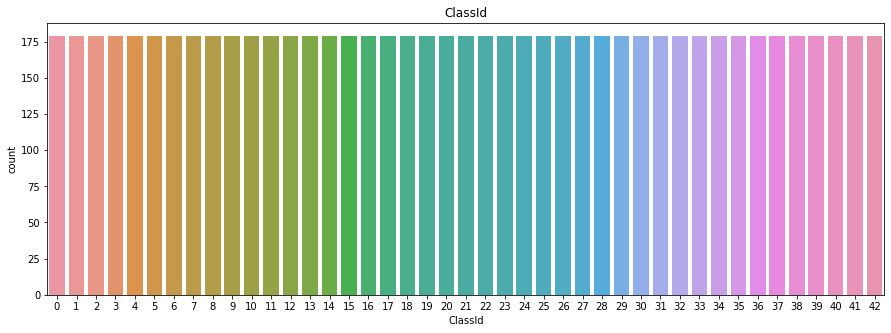

In [224]:
# Showing Current data Frequency

plt.figure(figsize = (15,5))
sns.countplot(y_train['ClassId'])
plt.title('ClassId')
plt.show()

By showing the histogram above, now all the class has same amount of datas.

In [225]:
# Set final train data after undersampling

train_data_final = pd.concat([y_train, X_train], axis = 1)
train_data_final

,ClassId,Path
0,0,trafficsign/Train/0/00000_00002_00011.png
1,0,trafficsign/Train/0/00000_00005_00021.png
2,0,trafficsign/Train/0/00000_00006_00019.png
3,0,trafficsign/Train/0/00000_00001_00018.png
4,0,trafficsign/Train/0/00000_00003_00003.png
...,...,...
7692,42,trafficsign/Train/42/00042_00001_00018.png
7693,42,trafficsign/Train/42/00042_00000_00012.png
7694,42,trafficsign/Train/42/00042_00006_00000.png
7695,42,trafficsign/Train/42/00042_00006_00012.png


## Augmentation

Augmentation is done to make the images more variety so it will performed well in testing. Rotation, and flip will be inserted to the augmentation model but skip flip vertical because it will confusing since in the Traffic sign there are Left and Righ sign :

<table>
  <tr>
    <th>Class ID</th>
    <th>Sign Image</th>
    <th>Description</th>
  </tr>
  
  </tr>
    <td style="text-align:center">19</td>
    <td><img src = "trafficsign/Meta/19.png"></td>
    <td style="text-align:center">Dangerous curve left</td>
  </tr>
  <tr>
    <td style="text-align:center">20</td>
    <td><img src = "trafficsign/Meta/20.png"></td>
    <td style="text-align:center">Dangerous curve right</td>
  </tr>
  </tr>
  <tr>
    <td style="text-align:center">33</td>
    <td><img src = "trafficsign/Meta/33.png"></td>
    <td style="text-align:center">Turn right ahead</td>
  </tr>
  <tr>
    <td style="text-align:center">34</td>
    <td><img src = "trafficsign/Meta/34.png"></td>
    <td style="text-align:center">Turn left ahead</td>
  </tr>
  <tr>
    <td style="text-align:center">36</td>
    <td><img src = "trafficsign/Meta/36.png"></td>
    <td style="text-align:center">Go straight or right</td>
  </tr>
  <tr>
    <td style="text-align:center">37</td>
    <td><img src = "trafficsign/Meta/37.png"></td>
    <td style="text-align:center">Go straight or left</td>
  </tr>
  <tr>
    <td style="text-align:center">38</td>
    <td><img src = "trafficsign/Meta/38.png"></td>
    <td style="text-align:center">Keep right</td>
  </tr>
  <tr>
    <td style="text-align:center">39</td>
    <td><img src = "trafficsign/Meta/39.png"></td>
    <td style="text-align:center">Keep left</td>
  </tr>
</table>

The augmentation still need to do rescaling. The process only apply in training dataset.  Later in ImageDataGenerator, the range of rotation angle choosen randomly.

In [226]:
# Data Augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45, 
    horizontal_flip=True
    )

## Standardize data 

Standardize Changes from the RGB value range into 0-1 so CNN can processing the images. It applied in test and validation dataset only (because train already implementing augmentation) by rescaling the images. In standardize the data, ImageDataGenerator is also used.

In [227]:
# Standardize data

rescale_datagen = ImageDataGenerator(rescale=1./255)

## Flow Data

Assuming this process done to generating the data train, validation, and test to adjusting the image so it can being processed in CNN model. Since the data already defined in Dataframe, the flow  will be define with flow from dataframe. Butf first, change the data type of each dataset ClassId to string so that in can be further processed.

In [228]:
# Change data type

train_data = train_data.astype({'ClassId':'string'})
train_data_final = train_data_final.astype({'ClassId':'string'})
val_data = val_data.astype({'ClassId':'string'})
test_data = test_data.astype({'ClassId':'string'})

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12620 entries, 0 to 12619
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ClassId  12620 non-null  string
 1   Path     12620 non-null  object
dtypes: object(1), string(1)
memory usage: 197.3+ KB


In [229]:
# Generate Data from Dataframe

ds_train_raw = rescale_datagen.flow_from_dataframe( # train_datagen
    dataframe=train_data_final,
    x_col='Path',
    y_col='ClassId',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=seed_ )

ds_train = train_datagen.flow_from_dataframe( # train_datagen
    dataframe=train_data_final,
    x_col='Path',
    y_col='ClassId',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=seed_ )

ds_val = rescale_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='Path',
    y_col='ClassId',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
    seed=seed_ )

ds_test = rescale_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='Path',
    y_col='ClassId',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
    seed=seed_)

Found 7697 validated image filenames belonging to 43 classes.
Found 7697 validated image filenames belonging to 43 classes.
Found 5882 validated image filenames belonging to 43 classes.
Found 12620 validated image filenames belonging to 43 classes.


The class mode choosen is categorical because we about classify muticlass data. The target size choosen based on average, The batchsize and the seed choosen randomly.

In [230]:
# Define Colomn List

column_lis = ['0','1','10','11','12','13','14','15','16','17','18','19','2','20','21','22','23','24','25','26','27','28','29','3','30','31','32','33','34','35','36','37','38','39','4','40','41','42', '5','6','7','8','9']

# 6 - Model Definition

In [231]:
K.clear_session() # To reset layer Number

## Before Improvement

Creating the model before improvement with basic Keras model. Both Sequential API and Function API will be configured with similiar configuration or parameter. The number of layer is choosen random along with the number of filters, and number of unit. The input shape based on the image input from all previous Loader parameter. The Number 3 choosen in kernel size because this has been popular size . The padding choosen is 'same' because in this model do not want to waste any elements. Activation at every layer except the last is ReLu  because it has simple output (0 or +) and faster to run. At the end (Dense Layer), Softmax choosen as activation because the data will be categorized with multiple class option (non-binary option) and the unit based on number of class.

### Sequential API
---

In [31]:
# Define Initial Sequential Model

model1A = Sequential([ # keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(img_width, img_width, channel)),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(units=128, activation='relu'),
  keras.layers.Dense(units=64, activation='relu'),
  keras.layers.Dense(units=num_classes, activation='softmax')
])


2022-09-19 14:46:49.331977: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The optimizer in compiling the model is adam because it the most common to used. Since the model is classifying images with multiple classes, the loss will be used categorical crossentropy. At the metrices, accuracy will be used since the data currently balanced.

In [32]:
# Compile Model

model1A.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model1A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

### Functional API
---

In [136]:
# Define Initial Functional Model

img_inputs = keras.Input(shape=(img_width, img_width, channel))
conv_1 = keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img_inputs)
maxpool_1 = keras.layers.MaxPooling2D()(conv_1)
conv_2 = keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(maxpool_1)
maxpool_2 = keras.layers.MaxPooling2D()(conv_2)
conv_3 = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(maxpool_2)
maxpool_3 = keras.layers.MaxPooling2D()(conv_3)
flatten = keras.layers.Flatten()(maxpool_3)
dense_1 = keras.layers.Dense(128, activation='relu')(flatten)
dense_2 = keras.layers.Dense(64, activation='relu')(dense_1)
output2A = keras.layers.Dense(num_classes, activation='softmax')(dense_2)

model2A = keras.Model(inputs=img_inputs, outputs=output2A)

The model compiler also similiar with sequential before improvement.

In [137]:
# Compile Model

model2A.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [138]:
model2A.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496 

## After Improvement

In improvement try adding maxpool, batch normalization, and dropping rate. Maxpool may decrease the time of computing and reduce the dimension. Strides values specified the movement distant of each step in the pool. In the models, pool size and strides picked random. Batch Normalization also added to stabilizing and accelerating training. The dropout rate also added with typically between 10% and 50%. The filters, padding, activation, input shape, number of layers remain the same. Later, Both Sequential API and functional API has similiar improvement.

### Sequential API
---

In [185]:
# Define Improved Sequential Model

model1B = Sequential([
  keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(img_width, img_width, channel)),
  keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1)),
  keras.layers.BatchNormalization(),

  keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1)),
  keras.layers.BatchNormalization(),

  keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1)),
  keras.layers.BatchNormalization(),

  keras.layers.Flatten(),
  keras.layers.Dense(units=128, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(rate=0.1),

  keras.layers.Dense(units=64, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(rate=0.1),
   
  keras.layers.Dense(units=num_classes, activation='softmax')
])


In after improvement, the compiler also will have similiar configuration with before improvement. This is due to Adam sofar is the most adaptive and faster. Since the running will took so much time along with repetition trial and error, there is no change needed in compiler on both Sequential and Functional.

In [186]:
# Compile Model

model1B.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model1B.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 49, 49, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                        

### Functional API
---

In [232]:
img_inputsB = keras.Input(shape=(img_width, img_width, channel))
conv_1B = keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu')(img_inputsB)
maxpool_1B = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1))(conv_1B)
norm_1B = keras.layers.BatchNormalization()(maxpool_1B)

conv_2B = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(norm_1B)
maxpool_2B = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1))(conv_2B)
norm_2B = keras.layers.BatchNormalization()(maxpool_2B)

conv_3B = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(norm_2B)
maxpool_3B = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1))(conv_3B)
norm_3B = keras.layers.BatchNormalization()(maxpool_3B)

flattenB = keras.layers.Flatten()(norm_3B)
dense_1B = keras.layers.Dense(units=128, activation='relu')(flattenB)
norm_4B = keras.layers.BatchNormalization()(dense_1B)
drop_1B = keras.layers.Dropout(rate=0.1)(norm_4B)

dense_2B = keras.layers.Dense(units=64, activation='relu')(drop_1B)
norm_5B =  keras.layers.BatchNormalization()(dense_2B)
drop_2B =  keras.layers.Dropout(rate=0.1)(norm_5B)
   
output2B = keras.layers.Dense(units=num_classes, activation='softmax')(drop_2B)

model2B = keras.Model(inputs=img_inputsB, outputs=output2B)


In [233]:
# Compile Model

model2B.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [234]:
model2B.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 49, 49, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0     

# 7 - Model Training

## Before Improvement

The loss The epoch could be larger, but since it caused overheatting and took so much time to running, the epochs 10 will be used instead. The batch size choosed random. Both Sequential and Functional have similiar training. In before improvement, the data train used is raw which means in here the train not appying augmenttaion. Meanwhile for after improvement, the data data train used is applying augmentation.

### Sequential API
---

In [34]:
# Fit model

history1A = model1A.fit(ds_train_raw, batch_size= 30, epochs= 10, validation_data= ds_val)

Epoch 1/10
482/482 [==============================] - 22s 44ms/step - loss: 2.7538 - accuracy: 0.2046 - val_loss: 1.8372 - val_accuracy: 0.3983
Epoch 2/10
482/482 [==============================] - 18s 37ms/step - loss: 1.3808 - accuracy: 0.5540 - val_loss: 1.1047 - val_accuracy: 0.6380
Epoch 3/10
482/482 [==============================] - 18s 37ms/step - loss: 0.6504 - accuracy: 0.7913 - val_loss: 0.6859 - val_accuracy: 0.7848
Epoch 4/10
482/482 [==============================] - 22s 45ms/step - loss: 0.3553 - accuracy: 0.8879 - val_loss: 0.4660 - val_accuracy: 0.8582
Epoch 5/10
482/482 [==============================] - 27s 56ms/step - loss: 0.2668 - accuracy: 0.9191 - val_loss: 0.4472 - val_accuracy: 0.8659
Epoch 6/10
482/482 [==============================] - 22s 46ms/step - loss: 0.1542 - accuracy: 0.9517 - val_loss: 0.3779 - val_accuracy: 0.8914
Epoch 7/10
482/482 [==============================] - 20s 42ms/step - loss: 0.1278 - accuracy: 0.9625 - val_loss: 0.3049 - val_accuracy:

### Functional API
---

In [139]:
# Fit model

history2A = model2A.fit(ds_train_raw, batch_size= 30, epochs= 10, validation_data= ds_val)

Epoch 1/10
482/482 [==============================] - 19s 37ms/step - loss: 2.8605 - accuracy: 0.2142 - val_loss: 1.5698 - val_accuracy: 0.5231
Epoch 2/10
482/482 [==============================] - 16s 34ms/step - loss: 0.9591 - accuracy: 0.6981 - val_loss: 0.7699 - val_accuracy: 0.7389
Epoch 3/10
482/482 [==============================] - 16s 33ms/step - loss: 0.4265 - accuracy: 0.8687 - val_loss: 0.5332 - val_accuracy: 0.8339
Epoch 4/10
482/482 [==============================] - 17s 36ms/step - loss: 0.2283 - accuracy: 0.9284 - val_loss: 0.4002 - val_accuracy: 0.8754
Epoch 5/10
482/482 [==============================] - 18s 37ms/step - loss: 0.1643 - accuracy: 0.9489 - val_loss: 0.3248 - val_accuracy: 0.9141
Epoch 6/10
482/482 [==============================] - 20s 41ms/step - loss: 0.1250 - accuracy: 0.9621 - val_loss: 0.4218 - val_accuracy: 0.8818
Epoch 7/10
482/482 [==============================] - 17s 35ms/step - loss: 0.0854 - accuracy: 0.9761 - val_loss: 0.3567 - val_accuracy:

## After Improvement

### Sequential API
---

In [187]:
# Fit model

history1B = model1B.fit(ds_train, batch_size= 30, epochs= 10, validation_data= ds_val)

Epoch 1/10
482/482 [==============================] - 104s 214ms/step - loss: 2.5851 - accuracy: 0.2861 - val_loss: 1.9289 - val_accuracy: 0.4578
Epoch 2/10
482/482 [==============================] - 109s 225ms/step - loss: 1.3691 - accuracy: 0.5837 - val_loss: 1.0881 - val_accuracy: 0.6603
Epoch 3/10
482/482 [==============================] - 112s 233ms/step - loss: 0.9049 - accuracy: 0.7220 - val_loss: 0.7655 - val_accuracy: 0.7618
Epoch 4/10
482/482 [==============================] - 113s 233ms/step - loss: 0.6522 - accuracy: 0.7950 - val_loss: 0.5335 - val_accuracy: 0.8176
Epoch 5/10
482/482 [==============================] - 107s 221ms/step - loss: 0.5428 - accuracy: 0.8305 - val_loss: 0.4776 - val_accuracy: 0.8501
Epoch 6/10
482/482 [==============================] - 112s 232ms/step - loss: 0.4425 - accuracy: 0.8636 - val_loss: 0.4059 - val_accuracy: 0.8648
Epoch 7/10
482/482 [==============================] - 108s 224ms/step - loss: 0.3882 - accuracy: 0.8767 - val_loss: 0.3235 -

### Functional API
---

In [235]:
# Fit model

history2B = model2B.fit(ds_train, batch_size= 30, epochs= 10, validation_data= ds_val)

Epoch 1/10
482/482 [==============================] - 101s 208ms/step - loss: 2.6229 - accuracy: 0.2813 - val_loss: 1.9182 - val_accuracy: 0.4655
Epoch 2/10
482/482 [==============================] - 103s 213ms/step - loss: 1.3988 - accuracy: 0.5754 - val_loss: 0.9656 - val_accuracy: 0.6919
Epoch 3/10
482/482 [==============================] - 108s 224ms/step - loss: 0.9115 - accuracy: 0.7205 - val_loss: 0.6755 - val_accuracy: 0.7878
Epoch 4/10
482/482 [==============================] - 112s 232ms/step - loss: 0.6673 - accuracy: 0.7959 - val_loss: 0.5809 - val_accuracy: 0.8115
Epoch 5/10
482/482 [==============================] - 114s 236ms/step - loss: 0.5266 - accuracy: 0.8324 - val_loss: 0.4137 - val_accuracy: 0.8723
Epoch 6/10
482/482 [==============================] - 112s 232ms/step - loss: 0.4321 - accuracy: 0.8638 - val_loss: 0.3419 - val_accuracy: 0.8914
Epoch 7/10
482/482 [==============================] - 115s 238ms/step - loss: 0.3899 - accuracy: 0.8775 - val_loss: 0.3119 -

# 8 - Model Evaluation

## Before Improvement

### Sequential API
---

Here are the results of the Sequential after Improvement.

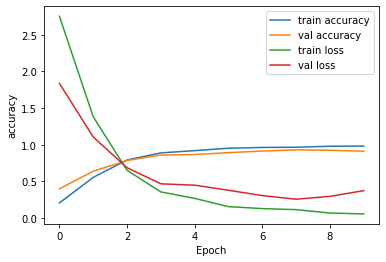

In [35]:
# History of training Plot

ep = 10

fig, ax = plt.subplots()
ax.plot(range(ep), history1A.history['accuracy'],label='train accuracy')
ax.plot(range(ep), history1A.history['val_accuracy'],label='val accuracy')
ax.plot(range(ep), history1A.history['loss'],label='train loss')
ax.plot(range(ep), history1A.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')
plt.legend()

When viewed from the graph, the accuracy and loss at the initial epoch is poor but then its intersect in second epochs and start perform more stable. The accuracy is almost good but the loss gap between val and train is still a bit further. For this reason, this model is still classified as an overfit. But the modal summary can be seen from table below.

In [38]:
# freeze model (For deployment)

model1A.trainable = False

# Display Summary

model1A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [39]:
# Model Evaluation

model1A.evaluate(ds_test)

789/789 [==============================] - 13s 16ms/step - loss: 0.9331 - accuracy: 0.8287


[0.9331187009811401, 0.8286846280097961]

Overall, after training, the result of evaluation for current model is about 83%.

In [40]:
# Predict Model

test_1A = model1A.predict(ds_test)

789/789 [==============================] - 10s 12ms/step


In [41]:
# Test result

test_1A_result = pd.DataFrame(test_1A, columns=column_lis)
test1Aresult = pd.DataFrame(test_1A_result.idxmax(axis=1), columns=['Model 1A prediction'])
test1A_with_pred = pd.concat([test_data, test1Aresult], axis = 1)
test1A_with_pred = test1A_with_pred.astype({'Model 1A prediction':'string'})
test1A_with_pred[['ClassId','Model 1A prediction']]

,ClassId,Model 1A prediction
0,16,16
1,1,1
2,38,38
3,33,33
4,11,11
...,...,...
12615,12,12
12616,33,33
12617,6,20
12618,7,7


Below is the classification report and Confussion matrix of Sequential model before improvement.

In [43]:
# Display Best Model Classification Report

print('Best Model classification report test : \n',classification_report(test1A_with_pred['ClassId'], test1A_with_pred['Model 1A prediction']))

Best Model classification report test : 
               precision    recall  f1-score   support

           0       0.31      0.98      0.47        60
           1       0.75      0.86      0.80       718
          10       0.99      0.90      0.94       660
          11       0.89      0.90      0.90       420
          12       0.90      0.92      0.91       690
          13       1.00      0.94      0.97       719
          14       1.00      0.92      0.96       270
          15       0.89      0.97      0.93       210
          16       0.99      0.95      0.97       150
          17       0.94      0.90      0.92       360
          18       0.88      0.81      0.85       389
          19       0.60      0.95      0.74        60
           2       0.78      0.74      0.76       750
          20       0.49      0.98      0.65        90
          21       0.88      0.50      0.64        90
          22       0.94      0.97      0.96       120
          23       0.81      0.64      

<AxesSubplot:>

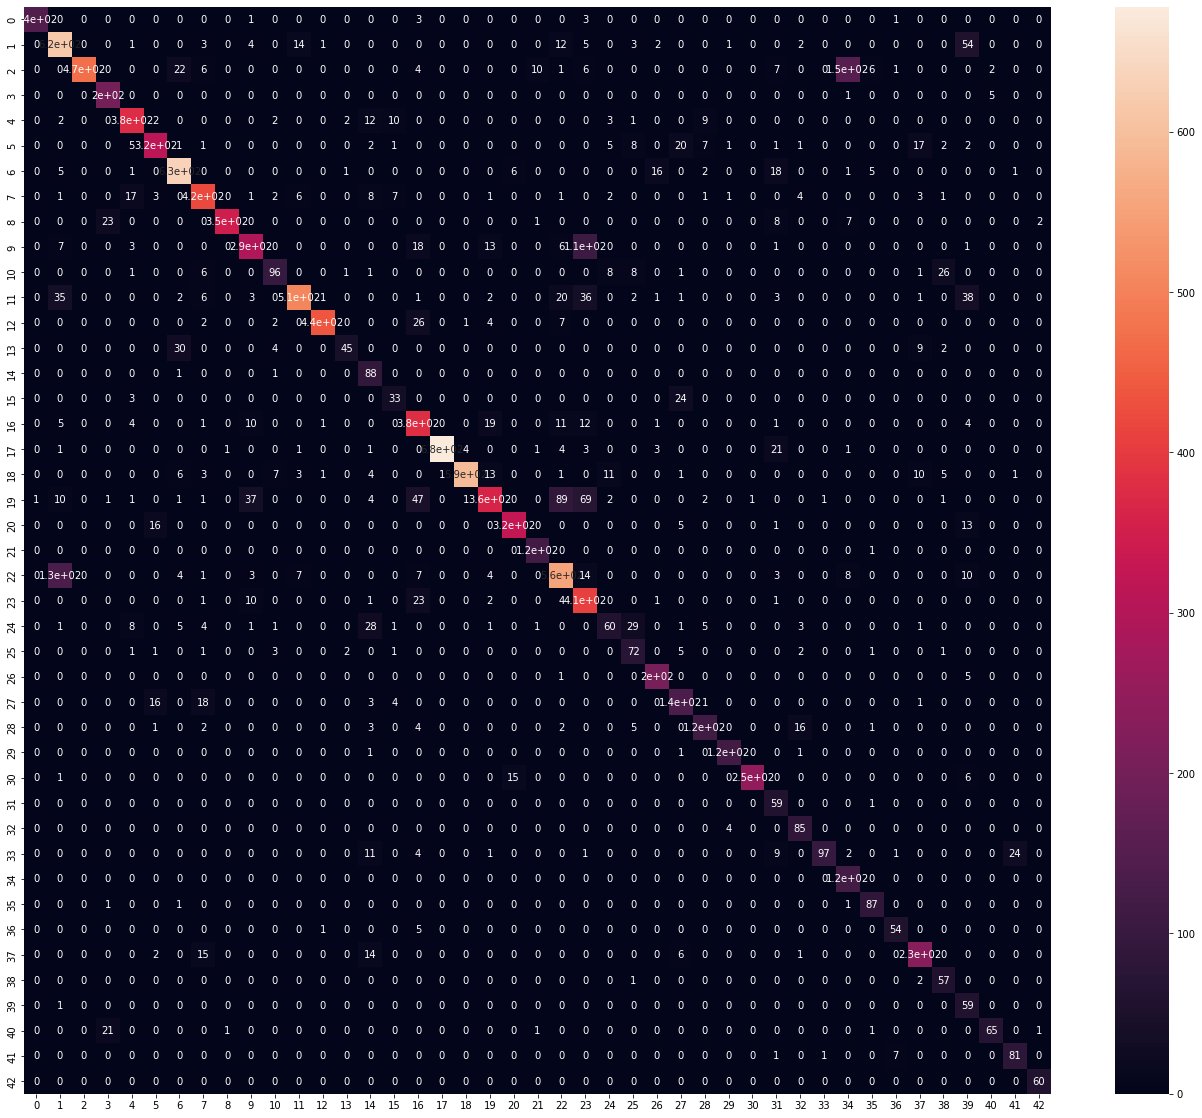

In [68]:
# Display Confussion Matrix

plt.figure(figsize=(23, 20))
model1A_confussionmatrix = confusion_matrix(test1A_with_pred['ClassId'], test1A_with_pred['Model 1A prediction'], labels=test1A_with_pred['ClassId'].unique())
sns.heatmap(model1A_confussionmatrix, annot=True)

The accuracy not far from the training. The precision and recalll result are varety. If we see from the confussion matrixes above, there are still missclasified data and it quiet a lot. But atleast the majority still prdicted right.

### Functional API
---

Here are the results of the Functional before Improvement.

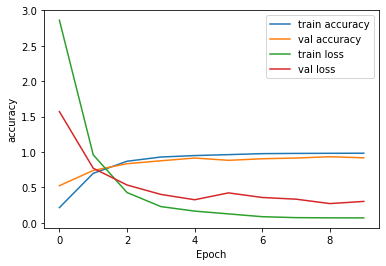

In [140]:
# History of training Plot
ep = 10

fig, ax = plt.subplots()
ax.plot(range(ep), history2A.history['accuracy'],label='train accuracy')
ax.plot(range(ep), history2A.history['val_accuracy'],label='val accuracy')
ax.plot(range(ep), history2A.history['loss'],label='train loss')
ax.plot(range(ep), history2A.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')
plt.legend()

At the start, train loss is high but then drastically increase. The interesect part are uncertain. Accuracy in train and val very stable. Meanwhile for the loss, both train and val also quite stable even it slightly different. This model also considered as overfit. Below is th result of the model.

In [141]:
# Display Summary

model2A.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496 

In [142]:
# Model Evaluation

model2A.evaluate(ds_test)

789/789 [==============================] - 11s 14ms/step - loss: 0.8461 - accuracy: 0.8352


[0.8461201190948486, 0.835182249546051]

Overall, the accuracy is considered better from sequential. 

In [143]:
# Predict Model

test_2A = model2A.predict(ds_test)

789/789 [==============================] - 11s 14ms/step


In [145]:
# Test Result

test_2A_result = pd.DataFrame(test_2A, columns=column_lis)
test2Aresult = pd.DataFrame(test_2A_result.idxmax(axis=1), columns=['Model 2A prediction'])
test2A_with_pred = pd.concat([test_data, test2Aresult], axis = 1)
test2A_with_pred = test2A_with_pred.astype({'Model 2A prediction':'string'})
test2A_with_pred[['ClassId','Model 2A prediction']]

,ClassId,Model 2A prediction
0,16,16
1,1,1
2,38,38
3,33,33
4,11,11
...,...,...
12615,12,12
12616,33,33
12617,6,32
12618,7,7


Below is the classification report and Confussion matrix of Functiona model before improvement.

In [146]:
# Display Classification Report

print('Best Model classification report test : \n',classification_report(test2A_with_pred['ClassId'], test2A_with_pred['Model 2A prediction']))


Best Model classification report test : 
               precision    recall  f1-score   support

           0       0.61      0.67      0.63        60
           1       0.87      0.70      0.78       718
          10       0.96      0.96      0.96       660
          11       0.95      0.90      0.93       420
          12       0.95      0.86      0.90       690
          13       0.95      0.96      0.95       719
          14       0.96      0.98      0.97       270
          15       0.64      1.00      0.78       210
          16       0.93      0.98      0.95       150
          17       0.99      0.90      0.94       360
          18       0.96      0.72      0.83       389
          19       0.64      0.95      0.77        60
           2       0.71      0.91      0.80       750
          20       0.89      0.97      0.93        90
          21       0.52      0.60      0.56        90
          22       0.63      0.97      0.76       120
          23       0.89      0.57      

<AxesSubplot:>

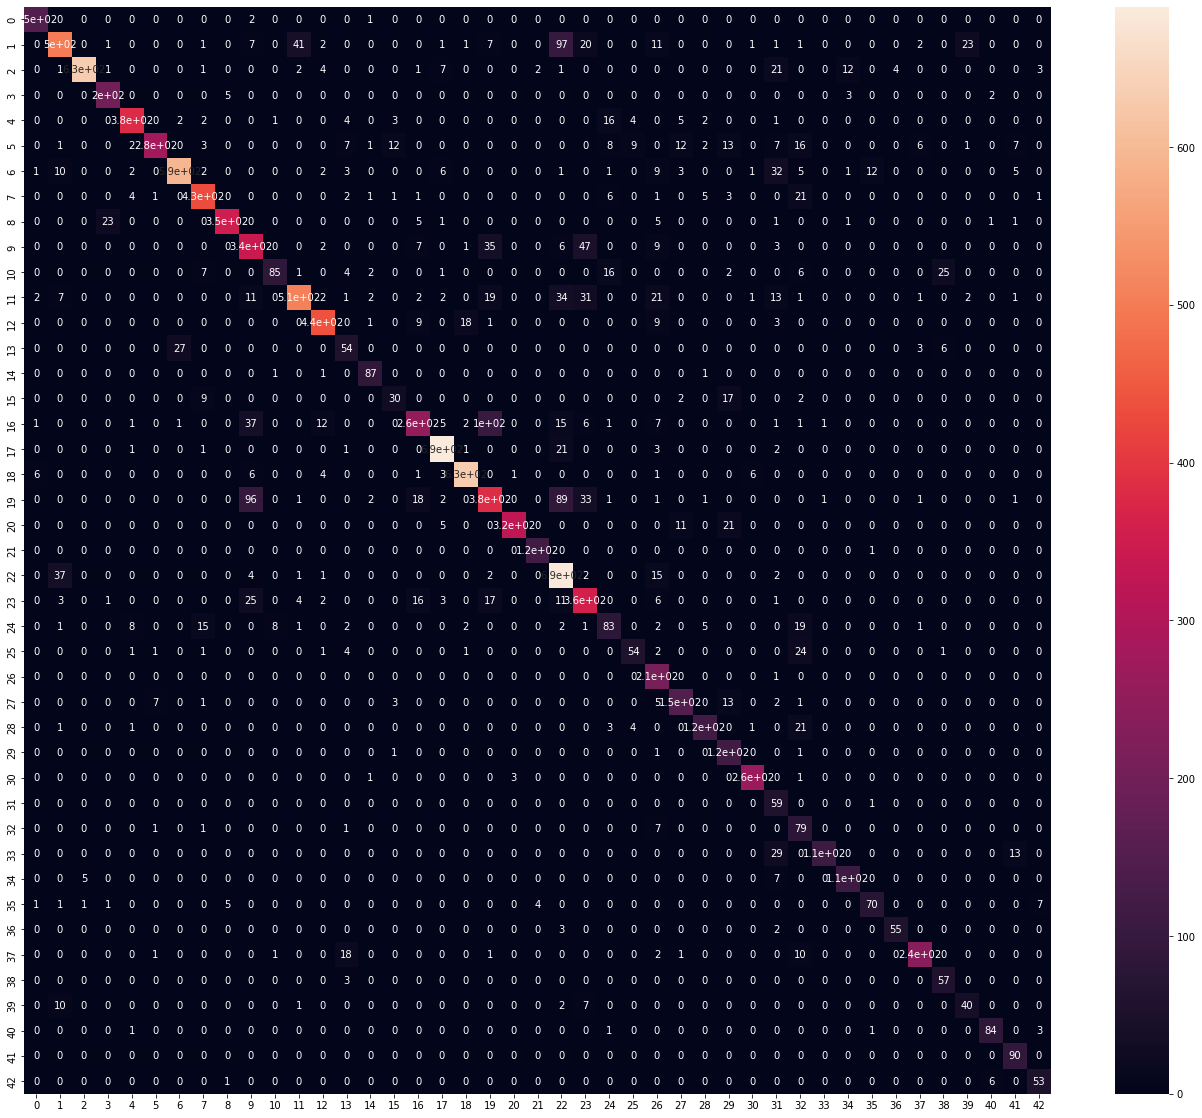

In [147]:
# Display Confussion Matrix

plt.figure(figsize=(23, 20))
model2A_confussionmatrix = confusion_matrix(test2A_with_pred['ClassId'], test2A_with_pred['Model 2A prediction'], labels=test2A_with_pred['ClassId'].unique())
sns.heatmap(model2A_confussionmatrix, annot=True)

Since the accuracy not far from Sequential, the resul is not too much different. The precision and recalll result are also varety and the missclasified data also quiet a lot even not majority.

## After Improvement

### Sequential API
---

Here are the results of the Sequential after Improvement.

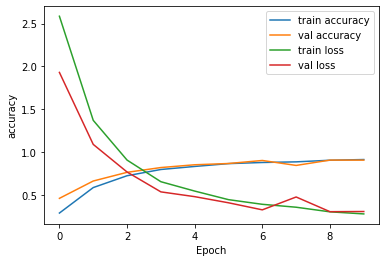

In [188]:
# History of training Plot
ep = 10

fig, ax = plt.subplots()
ax.plot(range(ep), history1B.history['accuracy'],label='train accuracy')
ax.plot(range(ep), history1B.history['val_accuracy'],label='val accuracy')
ax.plot(range(ep), history1B.history['loss'],label='train loss')
ax.plot(range(ep), history1B.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')
plt.legend()

The movement of accuracy and loss not different from previous model. On the graph, we can see that initially accuracy in both train and val are lower than the loss, but in certain Epoch it start to intersect with each other and resulting the accuracy is higher than the loss. If we look at the loss, the loss between train and vall seem unstable. This model considered as overfit but not quietfar. Below is th result of the model.

In [189]:
# freeze model

model1B.trainable = False

# Display Summary

model1B.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 49, 49, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                        

In [190]:
# Model Evaluation

model1B.evaluate(ds_test)

789/789 [==============================] - 27s 35ms/step - loss: 0.5452 - accuracy: 0.8250


[0.5451629757881165, 0.8250396251678467]

Overall from this model, the accuracy is lower than before improvement. Not sure the sequential model after improvement is better than before improvement.

In [191]:
# Predict Model

test_1B = model1B.predict(ds_test)

789/789 [==============================] - 30s 38ms/step


In [192]:
# Test Result

test_1B_result = pd.DataFrame(test_1B, columns=column_lis)
test1Bresult = pd.DataFrame(test_1B_result.idxmax(axis=1), columns=['Model 1B prediction'])
test1B_with_pred = pd.concat([test_data, test1Bresult], axis = 1)
test1B_with_pred = test1B_with_pred.astype({'Model 1B prediction':'string'})
test1B_with_pred[['ClassId','Model 1B prediction']]


,ClassId,Model 1B prediction
0,16,16
1,1,1
2,38,38
3,33,34
4,11,11
...,...,...
12615,12,12
12616,33,33
12617,6,10
12618,7,7


Below is the classification report and Confussion matrix of Sequential model after improvement.

In [193]:
# Display Classification Report

print('Best Model classification report test : \n',classification_report(test1B_with_pred['ClassId'], test1B_with_pred['Model 1B prediction']))

Best Model classification report test : 
               precision    recall  f1-score   support

           0       0.41      0.90      0.56        60
           1       0.78      0.77      0.78       718
          10       0.96      0.95      0.96       660
          11       0.94      0.90      0.92       420
          12       0.99      0.90      0.94       690
          13       0.96      0.97      0.97       719
          14       1.00      1.00      1.00       270
          15       0.98      0.93      0.96       210
          16       0.94      0.98      0.96       150
          17       1.00      0.90      0.95       360
          18       0.84      0.75      0.79       389
          19       0.54      0.62      0.58        60
           2       0.70      0.71      0.70       750
          20       0.37      0.60      0.46        90
          21       0.66      0.83      0.74        90
          22       0.98      0.84      0.91       120
          23       0.71      0.85      

<AxesSubplot:>

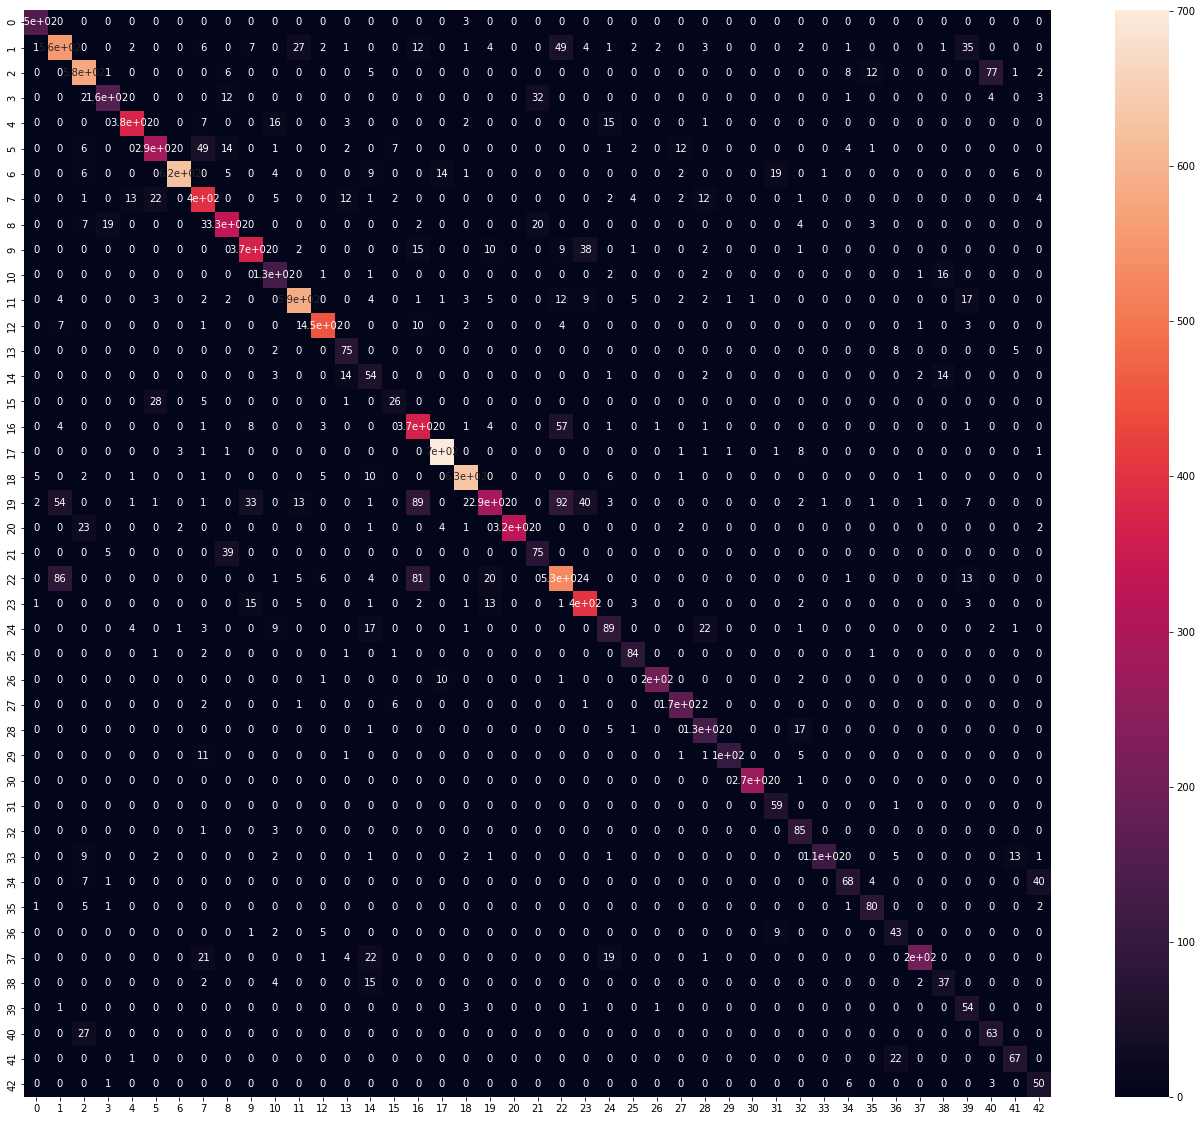

In [195]:
# Display Confussion Matrix

plt.figure(figsize=(23, 20))
model1B_confussionmatrix = confusion_matrix(test1B_with_pred['ClassId'], test1B_with_pred['Model 1B prediction'], labels=test1B_with_pred['ClassId'].unique())
sns.heatmap(model1B_confussionmatrix, annot=True)

Based on the report, the accuracy obtained similiar with sequential before improvement which is 83%. The Confussion matrix also not too much different than the model before (still the diagonal pattern for the win).

### Functional API
---

Here are the results of the Functional after Improvement.

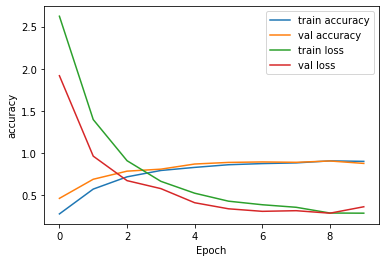

In [236]:
# History of training Plot
ep = 10

fig, ax = plt.subplots()
ax.plot(range(ep), history2B.history['accuracy'],label='train accuracy')
ax.plot(range(ep), history2B.history['val_accuracy'],label='val accuracy')
ax.plot(range(ep), history2B.history['loss'],label='train loss')
ax.plot(range(ep), history2B.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')
plt.legend()


The graph above not too different from sequential after improvement where the accuracy in both train and val are lower than the loss initially. The accuracy of train and val almost stable but the loss of train and val seem unstable. This model also overfit.

In [237]:
# Display Summary

model2B.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 49, 49, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0     

In [238]:
# Model Evaluation

model2B.evaluate(ds_test)

789/789 [==============================] - 27s 34ms/step - loss: 0.6506 - accuracy: 0.8027


[0.6505624055862427, 0.8026941418647766]

Overall, the accuracy and loss is worst among all models but the loss not quite high among others. 

In [239]:
# Predict Model

test_2B = model2B.predict(ds_test)

789/789 [==============================] - 35s 44ms/step


In [240]:
# Test Result

test_2B_result = pd.DataFrame(test_2B, columns=column_lis)
test2Bresult = pd.DataFrame(test_2B_result.idxmax(axis=1), columns=['Model 2B prediction'])
test2B_with_pred = pd.concat([test_data, test2Bresult], axis = 1)
test2B_with_pred = test2B_with_pred.astype({'Model 2B prediction':'string'})
test2B_with_pred[['ClassId','Model 2B prediction']]

,ClassId,Model 2B prediction
0,16,16
1,1,1
2,38,38
3,33,34
4,11,11
...,...,...
12615,12,12
12616,33,33
12617,6,38
12618,7,3


Below is the classification report and Confussion matrix of Functional model after improvement.

In [241]:

# Display Best Model Classification Report

print('Best Model classification report test : \n',classification_report(test2B_with_pred['ClassId'], test2B_with_pred['Model 2B prediction']))


Best Model classification report test : 
               precision    recall  f1-score   support

           0       0.63      0.98      0.77        60
           1       0.52      0.94      0.67       718
          10       0.98      0.88      0.93       660
          11       0.90      0.90      0.90       420
          12       1.00      0.86      0.92       690
          13       0.96      0.92      0.94       719
          14       0.97      1.00      0.99       270
          15       0.99      0.96      0.98       210
          16       0.97      0.95      0.96       150
          17       1.00      0.89      0.94       360
          18       0.93      0.74      0.82       389
          19       0.36      1.00      0.52        60
           2       0.65      0.78      0.71       750
          20       0.78      0.20      0.32        90
          21       0.77      0.66      0.71        90
          22       0.96      0.81      0.88       120
          23       0.55      0.77      

<AxesSubplot:>

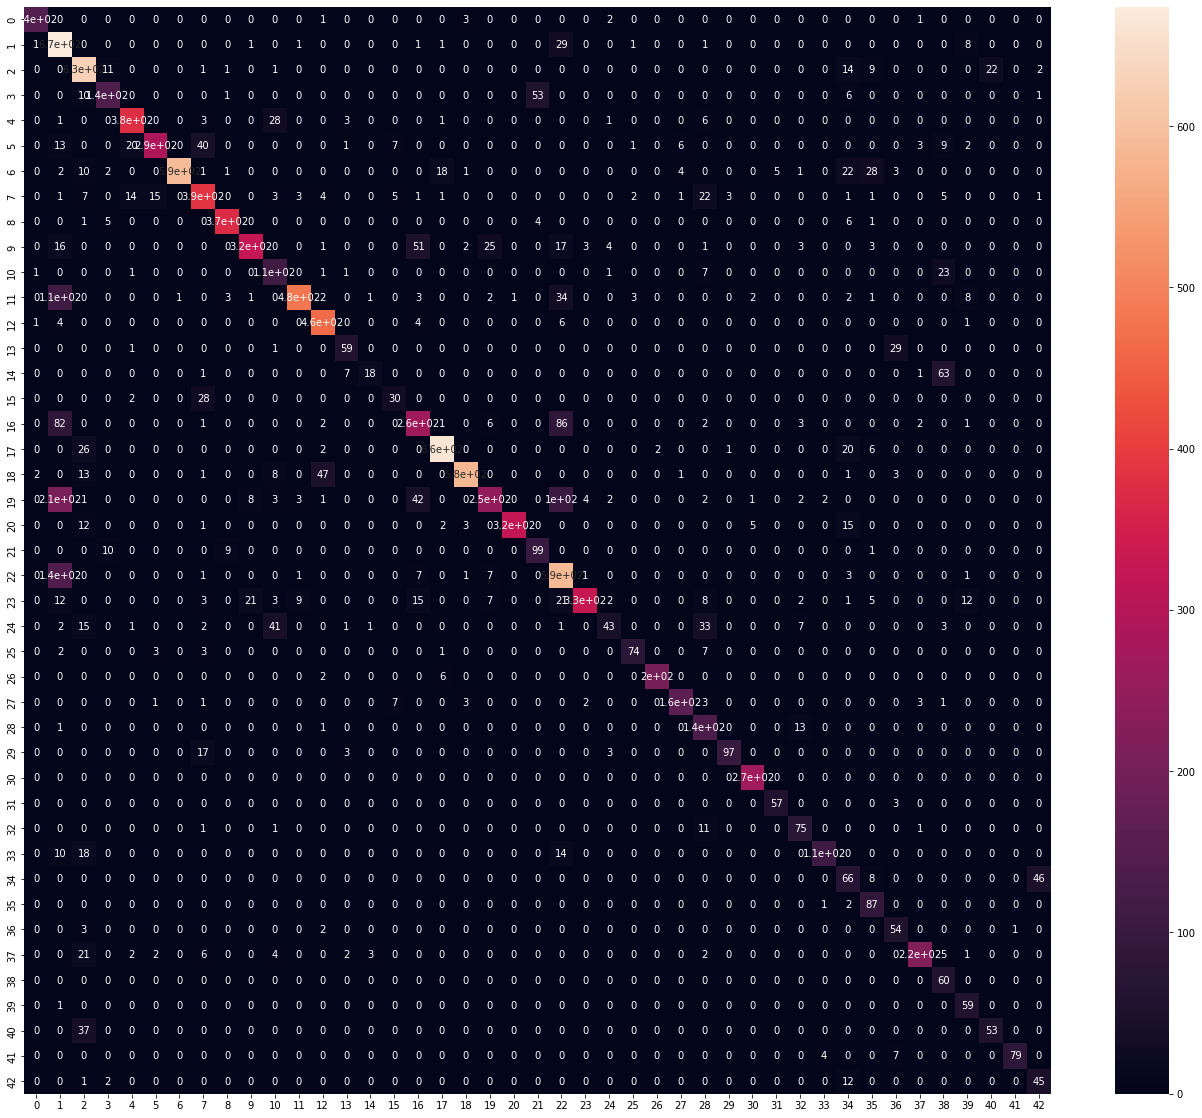

In [243]:
# Display Confussion Matrix

plt.figure(figsize=(23, 20))
model2B_confussionmatrix = confusion_matrix(test2B_with_pred['ClassId'], test2B_with_pred['Model 2B prediction'], labels=test2B_with_pred['ClassId'].unique())
sns.heatmap(model2B_confussionmatrix, annot=True)

Similiar with all of the model before, the accuracy in Classification report is similiar from the training. The Functionam model after improvement so far is the worst model.

Because of lack exploring, there is higher chance that the model can be improved better than the current model (Because model improvement suppose to be better than before improvement). Asdding more layer or add kernel initializer or change the optimizer probably help the result.

In this case, the goal is to classifying the images. When there is still misscalified or lost confused people who does not know any traffic sign it probably not affect to much. It will not affected to much because mostly the dataset provide traffic sign which often found on the road and the signs is pretty common among other drivers. People not allowed to drive if they does not recognize common Traffic sign. But it will different if there are more dataset which contain unfamiliar traffic sign. People can act inappropriately that can cause harm to themselves or others. In every situation we must have awareness.

# 9 - Model Saving

In [51]:
# Save Model

model1A.save("model1A")
! zip -r model1a.zip model1A

INFO:tensorflow:Assets written to: model1A/assets


INFO:tensorflow:Assets written to: model1A/assets


  adding: model1A/ (stored 0%)
  adding: model1A/keras_metadata.pb (deflated 92%)
  adding: model1A/variables/ (stored 0%)
  adding: model1A/variables/variables.data-00000-of-00001 (deflated 10%)
  adding: model1A/variables/variables.index (deflated 67%)
  adding: model1A/saved_model.pb (deflated 88%)
  adding: model1A/assets/ (stored 0%)


In [148]:
# Save Model

model2A.save("model2A")
! zip -r model2A.zip model2A

INFO:tensorflow:Assets written to: model2A/assets


INFO:tensorflow:Assets written to: model2A/assets


  adding: model2A/ (stored 0%)
  adding: model2A/keras_metadata.pb (deflated 92%)
  adding: model2A/variables/ (stored 0%)
  adding: model2A/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: model2A/variables/variables.index (deflated 67%)
  adding: model2A/saved_model.pb (deflated 88%)
  adding: model2A/assets/ (stored 0%)


In [196]:
# Save Model

model1B.save("model1B")
! zip -r model1B.zip model1B

INFO:tensorflow:Assets written to: model1B/assets


INFO:tensorflow:Assets written to: model1B/assets


  adding: model1B/ (stored 0%)
  adding: model1B/keras_metadata.pb (deflated 93%)
  adding: model1B/variables/ (stored 0%)
  adding: model1B/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: model1B/variables/variables.index (deflated 72%)
  adding: model1B/saved_model.pb (deflated 89%)
  adding: model1B/assets/ (stored 0%)


In [244]:
# Save Model

model2B.save("model2B")
! zip -r model2B.zip model2B

INFO:tensorflow:Assets written to: model2B/assets


INFO:tensorflow:Assets written to: model2B/assets


  adding: model2B/ (stored 0%)
  adding: model2B/keras_metadata.pb (deflated 93%)
  adding: model2B/variables/ (stored 0%)
  adding: model2B/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: model2B/variables/variables.index (deflated 72%)
  adding: model2B/saved_model.pb (deflated 89%)
  adding: model2B/assets/ (stored 0%)


# 10 - Model Inference

In [245]:
df_inf_fortest = df_inf[['ClassId','Path']]
df_inf_fortest = df_inf_fortest.astype({'ClassId':'string'})
df_inf_fortest

,ClassId,Path
0,33,trafficsign/Test/08703.png
1,23,trafficsign/Test/01308.png
2,25,trafficsign/Test/06749.png
3,29,trafficsign/Test/02100.png
4,1,trafficsign/Test/06811.png
5,8,trafficsign/Test/01816.png
6,13,trafficsign/Test/08921.png
7,18,trafficsign/Test/05239.png
8,1,trafficsign/Test/02955.png
9,34,trafficsign/Test/02832.png


In [246]:
ds_inf = rescale_datagen.flow_from_dataframe(
    dataframe=df_inf_fortest,
    x_col='Path',
    y_col='ClassId',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
    seed=seed_)

Found 10 validated image filenames belonging to 9 classes.


Sequential Before Improvement
---

In [54]:
# Predict Inference

inf_test_1A = model1A.predict(ds_inf)

1/1 [==============================] - 0s 63ms/step


In [56]:
# Prediction Result

inf_test_1A_result = pd.DataFrame(inf_test_1A,columns=column_lis)
inf_test1Aresult = pd.DataFrame(inf_test_1A_result.idxmax(axis=1), columns=['Model 1A prediction'])
inf_test1A_with_pred = pd.concat([df_inf_fortest, inf_test1Aresult], axis = 1)
inf_test1A_with_pred[['ClassId','Model 1A prediction']]

,ClassId,Model 1A prediction
0,33,33
1,23,23
2,25,25
3,29,29
4,1,0
5,8,8
6,13,13
7,18,18
8,1,1
9,34,34


Sequential Before Improvement can predict 9/10. It considered good enough.

Functional Before Improvement
---

In [151]:
# Predict Inference

inf_test_2A = model2A.predict(ds_inf)


1/1 [==============================] - 0s 56ms/step


In [153]:
# Prediction Result

inf_test_2A_result = pd.DataFrame(inf_test_2A, columns=column_lis)
inf_test2Aresult = pd.DataFrame(inf_test_2A_result.idxmax(axis=1), columns=['Model 2A prediction'])
inf_test2A_with_pred = pd.concat([df_inf_fortest, inf_test2Aresult], axis = 1)
inf_test2A_with_pred[['ClassId','Model 2A prediction']]

,ClassId,Model 2A prediction
0,33,33
1,23,23
2,25,25
3,29,29
4,1,0
5,8,8
6,13,13
7,18,26
8,1,4
9,34,34


Functional Before Improvement can predict 7/10. It considered okay.

Sequential After Improvement
---

In [199]:
# Predict Inference

inf_test_1B = model1B.predict(ds_inf)

1/1 [==============================] - 0s 84ms/step


In [200]:
# Prediction Result

inf_test_1B_result = pd.DataFrame(inf_test_1B, columns=column_lis)
inf_test1Bresult = pd.DataFrame(inf_test_1B_result.idxmax(axis=1), columns=['Model 1B prediction'])
inf_test1B_with_pred = pd.concat([df_inf_fortest, inf_test1Bresult], axis = 1)
inf_test1B_with_pred[['ClassId','Model 1B prediction']]


,ClassId,Model 1B prediction
0,33,33
1,23,23
2,25,25
3,29,29
4,1,4
5,8,8
6,13,15
7,18,18
8,1,1
9,34,34


Sequential After Improvement can predict 8/10. It considered good enough.

Functional After Improvement
---

In [247]:
# Predict Inference

inf_test_2B = model2B.predict(ds_inf)

1/1 [==============================] - 0s 144ms/step


In [248]:
# Prediction Result

inf_test_2B_result = pd.DataFrame(inf_test_2B, columns=column_lis)
inf_test2Bresult = pd.DataFrame(inf_test_2B_result.idxmax(axis=1), columns=['Model 2B prediction'])
inf_test2B_with_pred = pd.concat([df_inf_fortest, inf_test2Bresult], axis = 1)
inf_test2B_with_pred[['ClassId','Model 2B prediction']]

,ClassId,Model 2B prediction
0,33,33
1,23,23
2,25,25
3,29,29
4,1,1
5,8,8
6,13,13
7,18,18
8,1,4
9,34,34


Functional After Improvement can predict 9/10. It considered good enough.

All of the result above showing that currently all the model can predict just fine.

# 11 - Conclusion

Based on EDA :
- The dataset are from German Traffic Sign Recognition Benchmark and contain images which class were already Identified. Those clasess identified what the Traffic sign mean in each provided images. Currently, there are 42 class on the dataset. 
- German has more thousand sign including Warning signs, Regulatory Signs, Directional Signs, Trafic Installations, and Supplementary signs. The current Sign from the dataset is assumed as the common signs, so the conclusion not all sign is provided.
- In this dataset, the dataset splitted into train and test by default. So the dataset  of both train and test will be merged before continue the EDA. In the dataset, there are Width, Height, Roi.X1, Roi.Y1, Roi.X2, Roi.Y2, and ClassId. Roi.X1, Roi.Y1, Roi.X2, and Roi.Y2 give description about upper left coordinate (Roi.X1, Roi.Y1, Roi.X2) sign and Lower right coordinate (Roi.X2, Roi.Y2) sign on the image. The most important features to identifying the image in this dataset is only the image itself, so the column contain images path will only became our focus. The images currently are in .png format.
- When train and test dataset combined, all of the values from data description are changed. Based on table above, The average mean of width in each image is 50.75 with minimun width 25 and the maximun width 266. The range are quite high. Meanwhile for the height, the mean of height in each image is 50.3 with minimun height 25 and the maximun height 232. The range is also hight but not as high as the width. On upper left sign, tht coordinate mean is (5.9, 5.9) while the on lower right sign, the coordinate mean is (45.1, 44.7). If combined the mean an average image will have 50.75 x 50.33 size with their traffic sign position on the image at upper left will have coordinate (5.9, 5.9).
- All of the datas are imbalance. The most dominant number of signs is sign with ClassId number 2 (Speed limit (50km/h)) with total 3000 image. Meanwhile for the least amount there are 3 traffic sign with ClassId numbers 0 (Speed limit (20km/h)), 29 (Bicycles crossing), and 37 (Go straight or left) with total in each classID 270 images. This is probably due to the Traffic Sign in class 2 are pretty common but with this situation, the Traffic sign will hard to identify. In that case, the imbalance situation later will be solved if necessary. 
- The images provided have varying lengths and widths. This inequality is assumed to affect the performance of the model on architecture parameters, information loss, feature extraction, model complexity, hyper parameters. Therefore, later all images will be the same in length and width.
- Most sign has identical coordinate in upper left sign position while in lower right sign position the coordinates way more varied. There is still unknown what caused this result but there is posibility the data obtained with special camera or AI tool which can identified the position images at upper left better but cannot decided where the sign end at lower right. The image size may also affect the coordinates. Mind that there is/are images boundaries of the sign which intersect with edge of the image. If there is wide space on another edge of the image, the image not consider good enough to being identified. the more the overall position of the sign is centered, the better the result.
- The image analysis will only based on train dataset because this dataset is important for training the model.
- There are images which clear enough and there are image which very blurry. Can be affected by camera quality, took the picture while moving, etc.
- There are images which very bright and there are image which very dark. Can be affected by camera effect/filter or sun exposure.
- There even also images that shadowed with another object such as tree. Sun or lamp position may affect this result.
- Each of sign also have various background. It can be plain background or other scenery. Since the traffic sign often found in the open road it is understandable.
- When averaging the images based on matrix, some of the class are still can be identified but there also some class which not clear enough. Most of the sign position are in the center with correct plate (circle or triangle) but the sign itself in several images are not clear. Some of it too blurry, to dark which make the pattern hard to recognize sometimes even from human's eyes. This due to most picture provided is indeed blurry or have variety images form. This result has possibility can affect the result which caused missclassification.

The images data currently are too large to analyze considering there also many classes. Currently, the provided images is already proper to identify since it already cropped as needed but the blurry picture in the train dataset may ruin the result.

In this case, in classifying image, the CNN (Convolutional Neural Network) is used because this algorithm is pretty common to use in identifying images dataset. Before doing the modeling, some data processing such as data cleaning, augmentation, standardization of transformation is done so that the image can be applied to CNN. The modeling is done with two kinds of APIs, namely sequential and functional (with the same parameters). From this model, improvisation results are also carried out and compared to which one is the best for classifying images. 

Based on the results of the evaluation model, it can be seen that the best model is the pre-improvised model from Functional API with almost 84% accuracy. As for improved model, the best model is using Sequential API with 82% accuracy. In the future if required to identify Traffic sign, this model can be used.

When there is still misscalified or lost confused people who does not know any traffic sign it probably doesn't affect to much. It will not affected to much because mostly the dataset provide traffic sign which often found on the road and the signs is pretty common among other drivers. People not allowed to drive if they does not recognize common Traffic sign. But it will be different if there are more datasets which contain unfamiliar traffic signs. People can act inappropriately that can cause harm to themselves or others. In every situation we must have awareness.

For improving the model, probably try in another hardware. Try all kind of parameter, adding more layer, adding more epochs, and others. Also if possible, try improve by implementing camera recognition so when people want to use the app, they doesn/t have to take a picture then upload and process the images manually.  With camera recognition, people only have to took a picture and the camera will recognize what the Traffic Sign means.